# Trabajo práctico - Análisis Exploratorio 

## Consigna:

La ingeniería es el uso de principios científicos para diseñar y construir máquinas, estructuras y otros elementos, incluidos puentes, túneles, carreteras, vehículos y edificios. La disciplina de la ingeniería abarca una amplia gama de campos de ingeniería más especializados, cada uno con un énfasis más específico en áreas particulares de matemáticas aplicadas, ciencias aplicadas y tipos de aplicación. Una pregunta relevante es qué determina el salario y los trabajos que se les ofrecen a estos ingenieros inmediatamente después de la graduación. Varios factores, como las calificaciones universitarias, las habilidades del candidato, la proximidad de la universidad a los centros industriales, la especialización que uno tiene y las condiciones del mercado para industrias específicas, determinan esto. Sobre la base de estos diversos factores, su objetivo es determinar el salario de un graduado en ingeniería en la India. Con base en la información del portal de empleo AMCAT, la idea es utilizar los datos no solo para hacer una predicción salarial precisa, sino también para comprender qué influye en el salario y los títulos de trabajo en el mercado laboral.



---



Para abordar este análisis, podemos seguir los siguientes pasos:
1. *Exploración de datos*: Realizar una vista previa y limpieza de los datos para entender mejor su estructura y las posibles transformaciones necesarias.
2. *Análisis Descriptivo*: Examinar las estadísticas descriptivas de las variables clave para identificar patrones y relaciones preliminares entre las características y el salario.
3. *Análisis de Correlación*: Evaluar las correlaciones entre las variables independientes (como calificaciones, especialización, puntuaciones AMCAT, etc.) y la variable dependiente (salario).
4. *Modelado Predictivo*: Crear un modelo para predecir el salario basado en las características disponibles. Podemos explorar modelos como regresión lineal, árboles de decisión, o modelos más avanzados como random forest o XGBoost.
5. *Interpretación de Resultados*: Analizar los resultados del modelo para entender cuáles son los factores más influyentes en la determinación del salario.

## Librerías

1) Carga de librerías:

In [ ]:
# Bibliotecas para manipulación y visualización de datos
###########################################################
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para preprocesamiento de datos
###########################################################
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats

# Bibliotecas para la creación de modelos y selección de hiperparámetros
###########################################################
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.pipeline import make_pipeline

# Bibliotecas para la evaluación de modelos
###########################################################
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score, roc_auc_score

# Algoritmos de clasificación y regresión
###########################################################
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

# Herramientas para visualización de árboles y gráficos
###########################################################
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source


from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor

from sklearn.impute import SimpleImputer, KNNImputer

from scipy import stats

print("All libraries imported successfully!")

All libraries imported successfully!


## Dataset

2) Importación del dataset 'Engineering_graduate_salary.csv'. (descripción)

Se monta el drive para poder cargar el archivo csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A continuacion coloco la direccion

In [ ]:
engineering_dataset ='/content/drive/MyDrive/IFTS/EXPDATOS/Engineering_graduate_salary.csv'

si no puedo cargar el archivo en colab y trabajar

In [ ]:
# engineering_dataset='Engineering_graduate_salary.csv' <-- ESTA LINEA EVITA QUE SE CARGUE ADECUADAMENTE **NO EJECUTAR

In [ ]:
data = pd.read_csv(engineering_dataset)

data.head()

ID Gender       DOB  10percentage                       10board  \
0  604399.0      f  10/22/90         87.80                          cbse   
1  988334.0      m   5/15/90         57.00                          cbse   
2  301647.0      m   8/21/89         77.33  maharashtra state board,pune   
3  582313.0      m    5/4/91         84.30                          cbse   
4  339001.0      f  10/30/90         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0        2009.0         84.00                       cbse     6920.0   
1        2010.0         64.50                       cbse     6624.0   
2        2007.0         85.17  amravati divisional board     9084.0   
3        2009.0         86.00                       cbse     8195.0   
4        2008.0         75.00                       cbse     4889.0   

   CollegeTier       Degree                           Specialization  \
0          1.0  B.Tech/B.E.  instrumentation and control engineering   
1          2.0  B.Tech/B.E.           computer science & engineering   
2          2.0  B.Tech/B.E.         electronics & telecommunications   
3          1.0  B.Tech/B.E.           computer science & engineering   
4          2.0  B.Tech/B.E.                            biotechnology   

   collegeGPA  CollegeCityID  CollegeCityTier   CollegeState  GraduationYear  \
0       73.82         6920.0              1.0          Delhi          2013.0   
1       65.00         6624.0              0.0  Uttar Pradesh          2014.0   
2       61.94         9084.0              0.0    Maharashtra          2011.0   
3       80.40         8195.0              1.0          Delhi          2013.0   
4       64.30         4889.0              1.0     Tamil Nadu          2012.0   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      650      665    810  0.694479                485.0   
1      440      435    210  0.342315                365.0   
2      485      475    505  0.824666                 -1.0   
3      675      620    635  0.990009                655.0   
4      575      495    365  0.278457                315.0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                  366.0             -1.0            -1.0            -1.0   
1                   -1.0             -1.0            -1.0            -1.0   
2                  400.0             -1.0            -1.0            -1.0   
3                   -1.0             -1.0            -1.0            -1.0   
4                   -1.0             -1.0            -1.0            -1.0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0           -1       -1.0            -0.1590         0.3789        1.2396   
1           -1       -1.0             1.1336         0.0459        1.2396   
2          260       -1.0             0.5100        -0.1232        1.5428   
3           -1       -1.0            -0.4463         0.2124        0.3174   
4           -1       -1.0            -1.4992        -0.7473       -1.0697   

   nueroticism  openess_to_experience  Salary  
0      0.14590                 0.2889  445000  
1      0.52620                -0.2859  110000  
2     -0.29020                -0.2875  255000  
3      0.27270                 0.4805  420000  
4      0.06223                 0.1864  200000

10 board: secundaria
12 board: preparatoria
gender: f m
DOB: outliers?

(explicacion)
cuantos features hay, id,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2985 non-null   float64
 1   Gender                 2994 non-null   object 
 2   DOB                    2993 non-null   object 
 3   10percentage           2993 non-null   float64
 4   10board                2989 non-null   object 
 5   12graduation           2989 non-null   float64
 6   12percentage           2992 non-null   float64
 7   12board                2992 non-null   object 
 8   CollegeID              2988 non-null   float64
 9   CollegeTier            2992 non-null   float64
 10  Degree                 2983 non-null   object 
 11  Specialization         2983 non-null   object 
 12  collegeGPA             2988 non-null   float64
 13  CollegeCityID          2988 non-null   float64
 14  CollegeCityTier        2993 non-null   float64
 15  Coll

# **HASTA ACA, 2998 ES LA MAXIMA CANTIDAD DE REGISTROS**

El dataset contiene 34 columnas y 2998 registros, con algunas columnas que tienen valores faltantes. A continuación, se muestran algunos aspectos clave:
1. *Columnas*: El dataset incluye una variedad de variables, como el género del candidato, calificaciones en exámenes, identificación de la universidad, especialización, puntajes en secciones de AMCAT, y el salario ofrecido.
2. *Valores Faltantes*: Algunas columnas, como `ID`, `10board`, `12board`, `Degree`, `Specialization`, entre otras, tienen valores faltantes que podríamos necesitar manejar antes del análisis.
3. *Variables Numéricas y Categóricas*: Hay una mezcla de variables numéricas (por ejemplo, `10percentage`, `Salary`) y categóricas (por ejemplo, `Gender`, `Degree`).


Descripción de los datos

• ID: un ID único para identificar a un candidato. Ejemplo: "604399.0". Tipo de dato: float64.

• Salario: CTC anual ofrecido al candidato (en INR). Ejemplo: "445000". Tipo de dato: int64.

• Género: género del candidato. Ejemplo: "f". Tipo de dato: object.

• DOB: fecha de nacimiento del candidato. Ejemplo: "10/22/90". Tipo de dato: object.

• 10percentage: calificaciones generales obtenidas en los exámenes de grado 10. Ejemplo: "87.80". Tipo de dato: float64.

• 10board: el consejo escolar cuyo plan de estudios siguió el candidato en grado 10. Ejemplo: "cbse". Tipo de dato: object. Comentario: Equivale al nivel educativo de secundaria (12-15 años). Cabe aclarar que el "cbse" es el estándar adémico del Ministerio de Educación nacional de India.

• 12graduation: año de graduación: último año de secundaria. Ejemplo: "2009.0". Tipo de dato: float64.

• 12percentage: calificaciones generales obtenidas en los exámenes de grado 12. Ejemplo: "84.00". Tipo de dato: float64.

• 12board: el consejo escolar cuyo plan de estudios siguió el candidato. Ejemplo: "amravati divisional board".Tipo de dato: object. Comentario: Equivale al nivel educativo de preparatoria (16 - 17 años). Cabe aclarar que el "amravati divisional board" es el estándar adémico del Ministerio de Educación de una provincia de India.

• CollegeID: ID único que identifica la universidad/instituto al que asistió el candidato para su licenciatura. Ejemplo: "6920.0". Tipo de dato: float64.

• CollegeTier: cada universidad ha sido anotada como 1 o 2. Las anotaciones se han calculado a partir de los puntajes promedio de AMCAT obtenidos por los estudiantes en el colegio/universidad. Las universidades con un puntaje promedio por encima de un umbral se etiquetan como 1 y las demás como 2. Ejemplo: "1". Tipo de dato: float64.

• Título: título obtenido/perseguido por el candidato. Ejemplo: " ". Tipo de dato: object.

• Especialización: especialización que persigue el candidato

• CollegeGPA: promedio general de calificaciones al graduarse

• CollegeCityID: un identificador único para identificar la ciudad en la que se encuentra la universidad.

• CollegeCityTier: el nivel de la ciudad en la que se encuentra la universidad. Esto se anota en función de la población de las ciudades.

• CollegeState: Nombre del estado en el que se encuentra la universidad

• GraduationYear: Año de graduación (licenciatura)

• English: Puntajes en la sección de inglés de AMCAT

• Logical: Puntaje en la sección de habilidad lógica de AMCAT

• Quant: Puntaje en la sección de habilidad cuantitativa de AMCAT

• Domain: Puntajes en el módulo de dominio de AMCAT

• ComputerProgramming: Puntaje en la sección de programación informática de AMCAT

• ElectronicsAndSemicon: Puntaje en la sección de ingeniería electrónica y de semiconductores de AMCAT

• ComputerScience: Puntaje en la sección de ciencias de la computación de AMCAT

• MechanicalEngg: Puntaje en la sección de ingeniería mecánica de AMCAT

• ElectricalEngg: Puntaje en la sección de ingeniería eléctrica de AMCAT

• TelecomEngg: Puntaje en la sección de ingeniería de telecomunicaciones de AMCAT

• CivilEngg: Puntaje en la sección de ingeniería civil de AMCAT

• consciencia: Puntajes en una de las secciones de la prueba de personalidad de AMCAT

• amabilidad: Puntuaciones en una de las secciones del test de personalidad de AMCAT

• extraversión: Puntuaciones en una de las secciones del test de personalidad de AMCAT

• nueroticismo: Puntuaciones en una de las secciones del test de personalidad de AMCAT • openess_to_experience: Puntuaciones en una de las secciones del test de personalidad de AMCAT

| Column Name              | Example Data                                       | Data Type | Descripción                                                                                                                                                         | Comentarios |
|--|--|--|--|--|
| ID                       | 604399.0                                           | float64   | Un ID único para identificar a un candidato.                                                                                                                        |             |
| Gender                   | f                                                 | object    | Género del candidato.                                                                                                                                               |             |
| DOB                      | 10/22/90                                           | object    | Fecha de nacimiento del candidato.                                                                                                                                  |             |
| 10percentage             | 87.8                                               | float64   | Calificaciones generales obtenidas en los exámenes de grado 10.                                                                                                     |             |
| 10board                  | cbse                                               | object    | El consejo escolar cuyo plan de estudios siguió el candidato en grado 10.                                    |       Equivale al nivel educativo de secundaria (13-15 años).      |
| 12graduation             | 2009.0                                             | float64   | Año de graduación: último año de secundaria.                                                                                                                        |             |
| 12percentage             | 84.0                                               | float64   | Calificaciones generales obtenidas en los exámenes de grado 12.                                                                                                     |             |
| 12board                  | cbse                                               | object    | El consejo escolar cuyo plan de estudios siguió el candidato.                                             |        Equivale al nivel educativo de secundaria (16-18 años).      |
| CollegeID                | 6920.0                                             | float64   | ID único que identifica la universidad/instituto al que asistió el candidato para su licenciatura.                                                                  |             |
| CollegeTier              | 1.0                                                | float64   | Cada universidad ha sido anotada como 1 o 2. Las anotaciones se han calculado a partir de los puntajes promedio de AMCAT obtenidos por los estudiantes en la universidad. |             |
| Degree                   | B.Tech/B.E.                                        | object    | Título obtenido/perseguido por el candidato.                                                                                                                        |             |
| Specialization           | instrumentation and control engineering           | object    | Especialización que persigue el candidato.                                                                                                                          |             |
| collegeGPA               | 73.82                                              | float64   | Promedio general de calificaciones al graduarse.                                                                                                                    |             |
| CollegeCityID            | 6920.0                                             | float64   | Un identificador único para identificar la ciudad en la que se encuentra la universidad.                                                                            |             |
| CollegeCityTier          | 1.0                                                | float64   | El nivel de la ciudad en la que se encuentra la universidad. Esto se anota en función de la población de las ciudades.                                              |             |
| CollegeState             | Delhi                                              | object    | Nombre del estado en el que se encuentra la universidad.                                                                                                            |             |
| GraduationYear           | 2013.0                                             | float64   | Año de graduación (licenciatura).                                                                                                                                   |             |
| English                  | 650                                                | int64     | Puntajes en la sección de inglés de AMCAT.                                                                                                                          |             |
| Logical                  | 665                                                | int64     | Puntaje en la sección de habilidad lógica de AMCAT.                                                                                                                 |             |
| Quant                    | 810                                                | int64     | Puntaje en la sección de habilidad cuantitativa de AMCAT.                                                                                                           |             |
| Domain                   | 0.694479                                           | float64   | Puntajes en el módulo de dominio de AMCAT.                                                                                                                          |             |
| ComputerProgramming      | 485.0                                              | float64   | Puntaje en la sección de programación informática de AMCAT.                                                                                                         |             |
| ElectronicsAndSemicon    | 366.0                                              | float64   | Puntaje en la sección de ingeniería electrónica y de semiconductores de AMCAT.                                                                                      |             |
| ComputerScience          | -1.0                                               | float64   | Puntaje en la sección de ciencias de la computación de AMCAT.                                                                                                       |             |
| MechanicalEngg           | -1.0                                               | float64   | Puntaje en la sección de ingeniería mecánica de AMCAT.                                                                                                              |             |
| ElectricalEngg           | -1.0                                               | float64   | Puntaje en la sección de ingeniería eléctrica de AMCAT.                                                                                                             |             |
| TelecomEngg              | -1                                                 | int64     | Puntaje en la sección de ingeniería de telecomunicaciones de AMCAT.                                                                                                 |             |
| CivilEngg                | -1.0                                               | float64   | Puntaje en la sección de ingeniería civil de AMCAT.                                                                                                                 |             |
| conscientiousness        | -0.159                                             | float64   | Puntajes en una de las secciones de la prueba de personalidad de AMCAT.                                                                                             |             |
| agreeableness            | 0.3789                                             | float64   | Puntuaciones en una de las secciones del test de personalidad de AMCAT.                                                                                             |             |
| extraversion             | 1.2396                                             | float64   | Puntuaciones en una de las secciones del test de personalidad de AMCAT.                                                                                             |             |
| nueroticism              | 0.1459                                             | float64   | Puntuaciones en una de las secciones del test de personalidad de AMCAT.                                                                                             |             |
| openess_to_experience    | 0.2889                                             | float64   | Puntuaciones en una de las secciones del test de personalidad de AMCAT.                                                                                             |             |
| Salary                   | 445000                                             | int64     | CTC anual ofrecido al candidato (en INR).                                                                                                                           |             |


Comentarios:
- El AMCAT es una prueba de evaluación de **empleabilidad** en India que mide una variedad de habilidades, desde técnicas hasta de comunicación y razonamiento. Es ampliamente utilizado por empresas para reclutar talento adecuado y por candidatos para demostrar su competencia en diferentes áreas. La prueba es adaptativa, lo que significa que se ajusta en dificultad según las respuestas del candidato, proporcionando un perfil detallado de sus capacidades. Carreras de ingeniería, técnicas, maestrías. El puntaje en cada sección suele estar en un rango de 100 a 900 puntos.
- Dominio del AMCAT:
  - 0.0 - 0.3: Indicaría un bajo rendimiento en el módulo de dominio, sugiriendo que el candidato tiene un conocimiento limitado o insuficiente en esa área específica.
  - 0.3 - 0.6: Sugeriría un rendimiento medio, lo que significa que el candidato tiene una comprensión adecuada pero no excepcional del contenido evaluado.
  - 0.6 - 0.8: Indicaría un buen rendimiento, lo que significa que el candidato tiene un conocimiento sólido y competente en el dominio evaluado.
  - 0.8 - 1.0: Representaría un rendimiento excelente, sugiriendo que el candidato domina el área técnica evaluada.



Categorias para las evaluaciones de ingreso a las universidades, ranking.

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data

ID Gender       DOB  10percentage                       10board  \
0     604399.0      f  10/22/90         87.80                          cbse   
1     988334.0      m   5/15/90         57.00                          cbse   
2     301647.0      m   8/21/89         77.33  maharashtra state board,pune   
3     582313.0      m    5/4/91         84.30                          cbse   
4     339001.0      f  10/30/90         82.00                          cbse   
...        ...    ...       ...           ...                           ...   
2993  103174.0      f   4/17/89         75.00                             0   
2994  352811.0      f   7/22/91         84.00                   state board   
2995  287070.0      m  11/24/88         91.40                         bsemp   
2996  317336.0      m   8/25/88         88.64     karnataka education board   
2997  993701.0      m   5/27/92         77.00                   state board   

      12graduation  12percentage                    12board  CollegeID  \
0           2009.0         84.00                       cbse     6920.0   
1           2010.0         64.50                       cbse     6624.0   
2           2007.0         85.17  amravati divisional board     9084.0   
3           2009.0         86.00                       cbse     8195.0   
4           2008.0         75.00                       cbse     4889.0   
...            ...           ...                        ...        ...   
2993        2005.0         73.00                          0     1263.0   
2994        2008.0         77.00                state board     9481.0   
2995        2006.0         65.56                      bsemp      547.0   
2996        2006.0         65.16  karnataka education board     1629.0   
2997        2009.0         75.50                state board     1111.0   

      CollegeTier       Degree                             Specialization  \
0             1.0  B.Tech/B.E.    instrumentation and control engineering   
1             2.0  B.Tech/B.E.             computer science & engineering   
2             2.0  B.Tech/B.E.           electronics & telecommunications   
3             1.0  B.Tech/B.E.             computer science & engineering   
4             2.0  B.Tech/B.E.                              biotechnology   
...           ...          ...                                        ...   
2993          2.0  B.Tech/B.E.  electronics and communication engineering   
2994          2.0  B.Tech/B.E.                     information technology   
2995          2.0  B.Tech/B.E.                     information technology   
2996          2.0  B.Tech/B.E.                       computer engineering   
2997          2.0  B.Tech/B.E.                     information technology   

      collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
0          73.82         6920.0              1.0           Delhi   
1          65.00         6624.0              0.0   Uttar Pradesh   
2          61.94         9084.0              0.0     Maharashtra   
3          80.40         8195.0              1.0           Delhi   
4          64.30         4889.0              1.0      Tamil Nadu   
...          ...            ...              ...             ...   
2993       70.00         1263.0              1.0      Tamil Nadu   
2994       75.20         9481.0              0.0      Tamil Nadu   
2995       73.19          547.0              0.0  Madhya Pradesh   
2996       74.81         1629.0              1.0       Karnataka   
2997       69.30         1111.0              0.0      Tamil Nadu   

      GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
0             2013.0      650      665    810  0.694479                485.0   
1             2014.0      440      435    210  0.342315                365.0   
2             2011.0      485      475    505  0.824666                 -1.0   
3             2013.0      675      620    635  0.990009                655.0   
4             2012.0      575   

Explicar:
- Dominio
- Valores de los examenes del AMCAT con -1. Interpretamos que es un examen NO tomado.
- Tipo de dato diferente: TelecomEngg	-1	int64	Puntaje en la sección de ingeniería de telecomunicaciones de AMCAT.

Descrpición preliminar de los datos

In [ ]:
data.describe()

ID  10percentage  12graduation  12percentage     CollegeID  \
count  2.985000e+03   2993.000000   2989.000000   2992.000000  2.988000e+03   
mean   6.646699e+05     77.640194   2008.078287     74.309973  3.396576e+05   
std    3.647709e+05      9.998411      1.628856     11.124947  1.826439e+07   
min    1.124400e+04     43.000000   1998.000000     40.000000  2.000000e+00   
25%    3.337370e+05     71.170000   2007.000000     66.000000  5.270000e+02   
50%    6.396930e+05     78.800000   2008.000000     74.000000  4.032000e+03   
75%    9.951410e+05     85.500000   2009.000000     82.600000  8.840000e+03   
max    1.297877e+06     97.760000   2012.000000     98.700000  9.983839e+08   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  2992.000000  2988.000000    2988.000000      2993.000000   
mean      1.925134    74.414528    5213.529451         0.297695   
std       0.263219   160.543943    4775.579584         0.457321   
min       1.000000     6.630000       2.000000         0.000000   
25%       2.000000    66.497500     527.000000         0.000000   
50%       2.000000    71.775000    4032.000000         0.000000   
75%       2.000000    76.300000    8820.750000         1.000000   
max       2.000000  8836.000000   18409.000000         1.000000   

       GraduationYear      English      Logical        Quant       Domain  \
count     2993.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean      2011.936853   500.736157   500.168112   513.824216     0.508014   
std         36.811192   105.454809    87.416868   122.433492     0.463327   
min          0.000000   180.000000   195.000000   120.000000    -1.000000   
25%       2012.000000   425.000000   440.000000   430.000000     0.342315   
50%       2013.000000   500.000000   505.000000   515.000000     0.622643   
75%       2014.000000   570.000000   565.000000   595.000000     0.835612   
max       2017.000000   875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          2986.000000            2986.000000      2986.000000   
mean            351.897522              95.735432        93.961822   
std             204.373744             158.414850       177.649565   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             804.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     2986.000000     2977.000000  2998.000000  2992.000000   
mean        24.239786       16.389654    30.963642     1.952874   
std         99.972754       86.345556   103.426431    32.273553   
min         -1.000000       -1.000000    -1.000000    -1.000000   
25%         -1.000000       -1.000000    -1.000000    -1.000000   
50%         -1.000000       -1.000000    -1.000000    -1.000000   
75%         -1.000000       -1.000000    -1.000000    -1.000000   
max        623.000000      660.000000   548.000000   500.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        2998.000000    2990.000000   2990.000000  2990.000000   
mean           -0.039532       0.126956     -0.008371    -0.143612   
std             1.023173       0.952783      0.962369     1.014284   
min            -3.893300      -5.781600     -4.600900    -2.643000   
25%            -0.649100      -0.435300     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.172700   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.161700     3.352500   

       openess_to_experience        Salary  
count            2998.000000  2.998000e+03  
mean               -0.144820  3.050030e+05  
std   

## Limpieza de datos

In [ ]:
# Comenzar la limpieza de datos manejando los valores faltantes

# Verificar el número de valores faltantes por columna
missing_values = data.isnull().sum()

# Para un enfoque inicial, podemos:
# 1. Eliminar filas con valores faltantes en columnas críticas (ID, Gender, Salary).
# 2. Imputar o eliminar columnas con valores faltantes en menor medida o no críticas.

# Eliminar filas con valores faltantes en 'Gender', 'Salary', 'Degree', 'Specialization'
data_cleaned = data.dropna(subset=['Gender', 'Salary', 'Degree', 'Specialization'])

# Rellenar valores faltantes en columnas numéricas con la mediana
data_cleaned.fillna(data_cleaned.median(numeric_only=True), inplace=True)

# Rellenar valores faltantes en columnas categóricas con el modo
data_cleaned.fillna(data_cleaned.mode().iloc[0], inplace=True) # esto se queda con la primera de las modas para completar.

# Verificar nuevamente si quedan valores faltantes
missing_values_after = data_cleaned.isnull().sum()

missing_values, missing_values_after, data_cleaned.shape

(ID                       13
 Gender                    4
 DOB                       5
 10percentage              5
 10board                   9
 12graduation              9
 12percentage              6
 12board                   6
 CollegeID                10
 CollegeTier               6
 Degree                   15
 Specialization           15
 collegeGPA               10
 CollegeCityID            10
 CollegeCityTier           5
 CollegeState              5
 GraduationYear            5
 English                   0
 Logical                   0
 Quant                     0
 Domain                    0
 ComputerProgramming      12
 ElectronicsAndSemicon    12
 ComputerScience          12
 MechanicalEngg           12
 ElectricalEngg           21
 TelecomEngg               0
 CivilEngg                 6
 conscientiousness         0
 agreeableness             8
 extraversion              8
 nueroticism               8
 openess_to_experience     0
 Salary                    0
 dtype: int64,

In [ ]:
data_cleaned.isnull().sum() #VERIFICAMOS

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

La limpieza de datos ha sido exitosa. Hemos manejado los valores faltantes de la siguiente manera:

*   *Columnas Críticas*: Se eliminaron filas con valores faltantes en columnas clave como `Gender`, `Salary`, `Degree`, y `Specialization`.
*   *Relleno de Valores Faltantes*:
*   Las columnas numéricas se rellenaron con la mediana.
*   Las columnas categóricas de rellenaron con el valor más común (modo).

Ahora, el conjunto de datos contiene 2983 registros y no tiene valores faltantes.



In [ ]:
# Manejo de valores duplicados          (GRUPO 2 OPINA QUE ESTO SERIA MEJOR EVALUARLO AL PRINCIPIO Y SOLAMENTE CON LA COLUMNA ID.)

# Identifica las filas duplicadas basadas en todas las columnas
duplicates_based_on_all_columns = data_cleaned[data.duplicated(keep=False)]

# Muestra el número de filas con duplicados en todas las columnas
print("Número de filas donde hay duplicados con respecto a todas las columnas:")
print(len(duplicates_based_on_all_columns))

# Muestra las filas duplicadas
print(duplicates_based_on_all_columns)

Número de filas donde hay duplicados con respecto a todas las columnas:
6
           ID Gender      DOB  10percentage      10board  12graduation  \
141  359993.0      m  5/20/90          72.0  state board        2007.0   
142  359993.0      m  5/20/90          72.0  state board        2007.0   
143  359993.0      m  5/20/90          72.0  state board        2007.0   
144  359993.0      m  5/20/90          72.0  state board        2007.0   
145  359993.0      m  5/20/90          72.0  state board        2007.0   
146  359993.0      m  5/20/90          72.0  state board        2007.0   

     12percentage      12board  CollegeID  CollegeTier       Degree  \
141          60.0  state board     1245.0          2.0  B.Tech/B.E.   
142          60.0  state board     1245.0          2.0  B.Tech/B.E.   
143          60.0  state board     1245.0          2.0  B.Tech/B.E.   
144          60.0  state board     1245.0          2.0  B.Tech/B.E.   
145          60.0  state board     1245.0          2

In [ ]:
# Remuevo los datos duplicados de mi dataset

data_cleaned = data_cleaned.drop_duplicates()

# Verifico la eliminación de los datos duplicados
duplicates = data_cleaned[data_cleaned.duplicated()]

duplicates

Empty DataFrame
Columns: [ID, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2979 non-null   float64
 1   Gender                 2979 non-null   object 
 2   DOB                    2979 non-null   object 
 3   10percentage           2979 non-null   float64
 4   10board                2979 non-null   object 
 5   12graduation           2979 non-null   float64
 6   12percentage           2979 non-null   float64
 7   12board                2979 non-null   object 
 8   CollegeID              2979 non-null   float64
 9   CollegeTier            2979 non-null   float64
 10  Degree                 2979 non-null   object 
 11  Specialization         2979 non-null   object 
 12  collegeGPA             2979 non-null   float64
 13  CollegeCityID          2979 non-null   float64
 14  CollegeCityTier        2979 non-null   float64
 15  CollegeSt

Para el manejo de valores duplicados simplemente usamos funciones para identificarlos y posteriormente eliminarlos. Quedando de esta manera, un dataset de 2979 registros.

In [ ]:
# Realizar análisis descriptivo de las variables numéricas y categóricas

# Descripción estadística de las variables numéricas
numeric_summary = data_cleaned.describe()

# Descripción de las variables categóricas (frecuencia de los valores únicos)
categorical_summary = data_cleaned.describe(include=['object'])

numeric_summary, categorical_summary

(                 ID  10percentage  12graduation  12percentage     CollegeID  \
 count  2.979000e+03   2979.000000   2979.000000   2979.000000  2.979000e+03   
 mean   6.650409e+05     77.658318   2008.079557     74.335569  3.406770e+05   
 std    3.642602e+05      9.985823      1.626896     11.121475  1.829195e+07   
 min    1.124400e+04     43.000000   1998.000000     40.000000  2.000000e+00   
 25%    3.337800e+05     71.185000   2007.000000     66.000000  5.270000e+02   
 50%    6.392150e+05     78.930000   2008.000000     74.000000  4.042000e+03   
 75%    9.951650e+05     85.500000   2009.000000     82.600000  8.840000e+03   
 max    1.297877e+06     97.760000   2012.000000     98.700000  9.983839e+08   
 
        CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
 count  2979.000000  2979.000000    2979.000000      2979.000000   
 mean      1.925143    74.433538    5222.781806         0.297080   
 std       0.263205   160.785788    4777.263463         0.457049   
 min  

## Análisis

Estadísticas importantes

In [ ]:
data_cleaned.describe()

ID  10percentage  12graduation  12percentage     CollegeID  \
count  2.979000e+03   2979.000000   2979.000000   2979.000000  2.979000e+03   
mean   6.650409e+05     77.658318   2008.079557     74.335569  3.406770e+05   
std    3.642602e+05      9.985823      1.626896     11.121475  1.829195e+07   
min    1.124400e+04     43.000000   1998.000000     40.000000  2.000000e+00   
25%    3.337800e+05     71.185000   2007.000000     66.000000  5.270000e+02   
50%    6.392150e+05     78.930000   2008.000000     74.000000  4.042000e+03   
75%    9.951650e+05     85.500000   2009.000000     82.600000  8.840000e+03   
max    1.297877e+06     97.760000   2012.000000     98.700000  9.983839e+08   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  2979.000000  2979.000000    2979.000000      2979.000000   
mean      1.925143    74.433538    5222.781806         0.297080   
std       0.263205   160.785788    4777.263463         0.457049   
min       1.000000     6.630000       2.000000         0.000000   
25%       2.000000    66.500000     527.000000         0.000000   
50%       2.000000    71.800000    4042.000000         0.000000   
75%       2.000000    76.300000    8823.000000         1.000000   
max       2.000000  8836.000000   18409.000000         1.000000   

       GraduationYear      English      Logical        Quant       Domain  \
count     2979.000000  2979.000000  2979.000000  2979.000000  2979.000000   
mean      2011.933870   500.922122   500.459886   514.142330     0.508163   
std         36.897476   105.379132    87.348641   122.425076     0.464369   
min          0.000000   180.000000   195.000000   120.000000    -1.000000   
25%       2012.000000   425.000000   442.500000   430.000000     0.342315   
50%       2013.000000   500.000000   505.000000   515.000000     0.622643   
75%       2014.000000   570.000000   565.000000   595.000000     0.837621   
max       2017.000000   875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          2979.000000            2979.000000      2979.000000   
mean            352.150050              95.476334        93.394092   
std             204.052507             158.338353       177.326729   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             804.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     2979.000000     2979.000000  2979.000000  2979.000000   
mean        23.937227       16.247398    30.929842     1.965760   
std         99.520589       86.049177   103.386257    32.343328   
min         -1.000000       -1.000000    -1.000000    -1.000000   
25%         -1.000000       -1.000000    -1.000000    -1.000000   
50%         -1.000000       -1.000000    -1.000000    -1.000000   
75%         -1.000000       -1.000000    -1.000000    -1.000000   
max        623.000000      660.000000   548.000000   500.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        2979.000000    2979.000000   2979.000000  2979.000000   
mean           -0.039126       0.128627     -0.009706    -0.145588   
std             1.024078       0.949677      0.960977     1.011997   
min            -3.893300      -5.781600     -4.600900    -2.643000   
25%            -0.649100      -0.343350     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.172700   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.161700     3.352500   

       openess_to_experience        Salary  
count            2979.000000  2.979000e+03  
mean               -0.141920  3.054646e+05  
std   

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2979 non-null   float64
 1   Gender                 2979 non-null   object 
 2   DOB                    2979 non-null   object 
 3   10percentage           2979 non-null   float64
 4   10board                2979 non-null   object 
 5   12graduation           2979 non-null   float64
 6   12percentage           2979 non-null   float64
 7   12board                2979 non-null   object 
 8   CollegeID              2979 non-null   float64
 9   CollegeTier            2979 non-null   float64
 10  Degree                 2979 non-null   object 
 11  Specialization         2979 non-null   object 
 12  collegeGPA             2979 non-null   float64
 13  CollegeCityID          2979 non-null   float64
 14  CollegeCityTier        2979 non-null   float64
 15  CollegeSt

### Variables Numéricas

* *Salario*: El salario medio ofrecido es aproximadamente ₹305,350, con un rango que va desde ₹35,000 hasta ₹4,000,000.
* *Calificaciones*:
* Las calificaciones en el 10mo y 12mo grado tienen una media cercana al 77% y 74% respectivamente.
* El GPA universitario medio es de alrededor de 74.4.
* *AMCAT Scores*:
* Los puntajes en habilidades cuantitativas, de inglés, y otras áreas técnicas (como programación, ingeniería mecánica, etc.) varían significativamente.

### Variables Categóricas
* *Género*: Hay un mayor número de candidatos masculinos (`m`) en comparación con las candidatas femeninas (`f`).
* *Consejos Escolares*: Los consejos escolares más comunes para los exámenes de grado 10 y 12 son `cbse`.
* *Títulos*: La mayoría de los candidatos tiene un título `B.Tech/B.E.`.
* *Especialización*: La especialización más común es `electronics and communication engineering`.

Estos resúmenes nos brindan una visión preliminar de los datos.

Vamos a explorar cada una de estas relaciones para entender mejor cómo influyen el salario de los graduados en ingeniería. Comenzaremos con la relación entre calificaciones y salario.

### Análisis 1: Relación entre calificaciones (10th, 12th, GPA) y salario

Exploraremos si hay alguna correlación entre calificaciones escolares/universitarias y el salario ofrecido.

### Análisis 2: Impacto de la especialización en el salario

Investigaremos si la especialización en ingeniería tiene un efecto significativo en el salario.

### Análisis 3: Influencia de los puntajes de AMCAT en el salario

Verificaremos la relación entre las habilidades medidas por AMCAT y el salario.

### Análisis 4: Comparación de salarios por género y universidad (CollegeTier)

Compararemos los salarios en función del género y del nivel de la universidad.

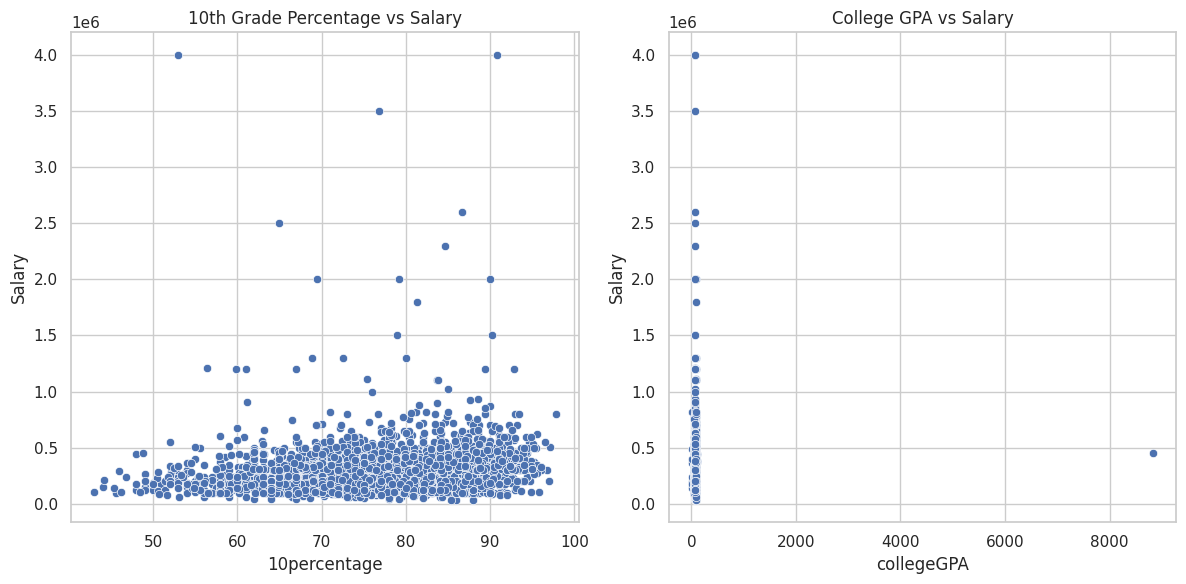

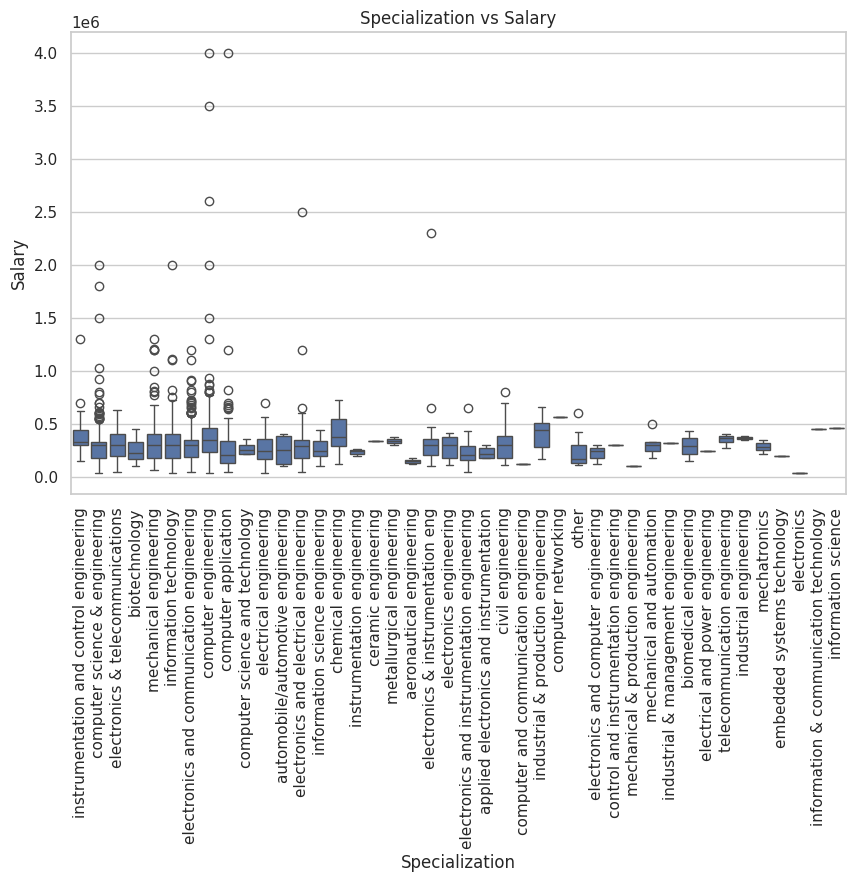

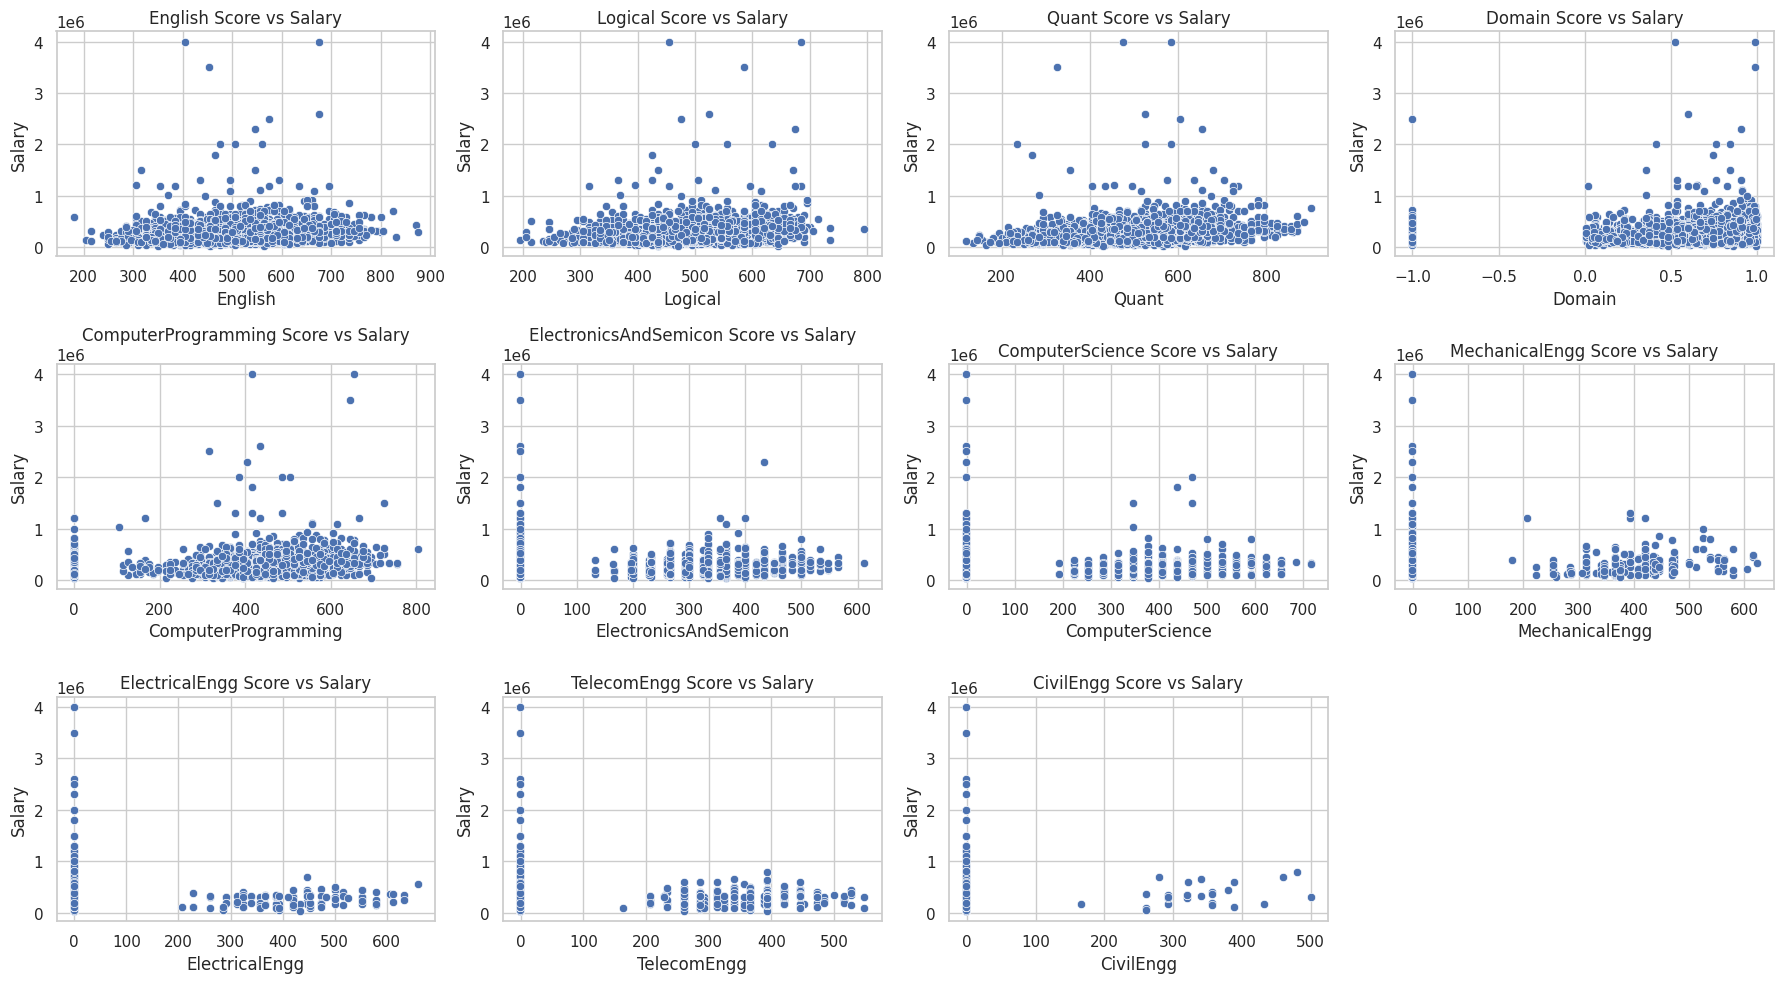

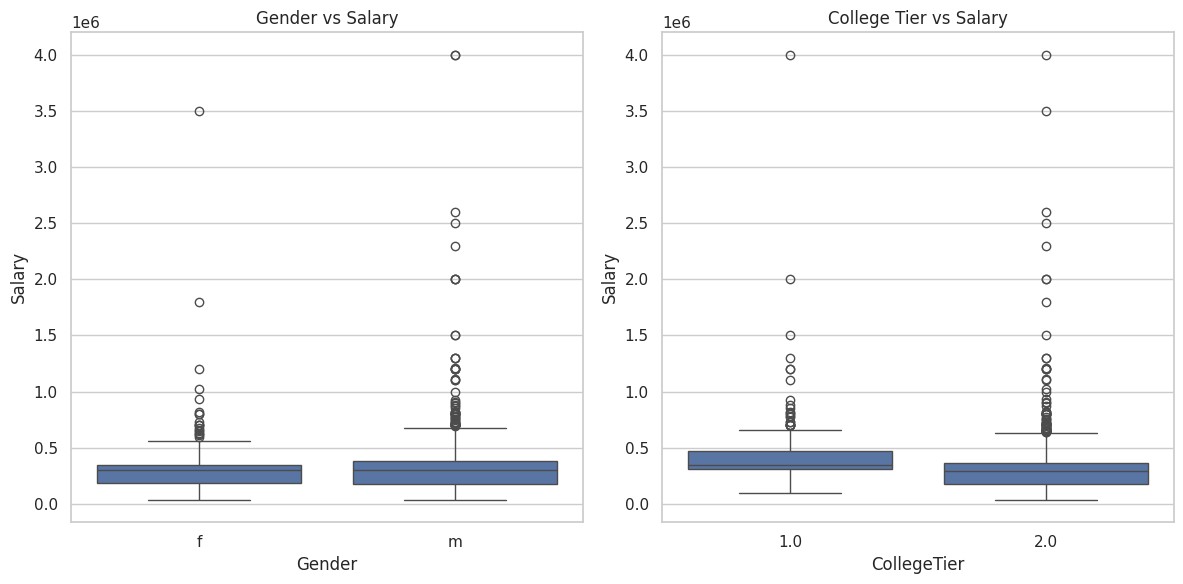

In [ ]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# 1. Relación entre calificaciones (10th, 12th, GPA) y salario
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='10percentage', y='Salary', data=data_cleaned)
plt.title('10th Grade Percentage vs Salary')

plt.subplot(1, 3, 2)
sns.scatterplot(x='collegeGPA', y='Salary', data=data_cleaned)
plt.title('College GPA vs Salary')

plt.tight_layout()
plt.show

# 2. Impacto de la especialización en el salario
plt.figure(figsize=(10, 6))
sns.boxplot(x='Specialization', y='Salary', data=data_cleaned)
plt.xticks(rotation=90)
plt.title('Specialization vs Salary')
plt.show()

# 3. Influencia de los puntajes de AMCAT en el salario
plt.figure(figsize=(18, 10))

amcat_scores = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

for i, score in enumerate(amcat_scores, 1):
  plt.subplot(3, 4, i)
  sns.scatterplot(x=score, y='Salary', data=data_cleaned)
  plt.title(f'{score} Score vs Salary')

plt.tight_layout()
plt.show()

# 4. Comparación de salarios por género y nivel de universidad (CollegeTier)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Salary', data=data_cleaned)
plt.title('Gender vs Salary')

plt.subplot(1, 2, 2)
sns.boxplot(x='CollegeTier', y='Salary', data=data_cleaned)
plt.title('College Tier vs Salary')

plt.tight_layout()
plt.show()

////// GRUPO 2 //////

* DE ACA VEMOS QUE EL GRUESO DE COLLEGE TIER 1 GANA UN PROOMEDIO DE SUELDO UN POCO SUPERIOR, PERO NO ES LA GRAN DIFERENCIA.
* EN COLLEGE TIER 2 EXISTEN LA MAYOR CANTIDAD DE OUTLYERS.

## Matriz de correlación

Analizamos las variables de tipo de dato "object"

In [ ]:
data_cleaned['Salary'].unique()

array([ 445000,  110000,  255000,  420000,  200000,  440000,  150000,
        105000,  195000,  335000,  300000,  480000,  550000,  325000,
        405000,  500000,  210000,  400000,  360000,  240000,  120000,
        430000,  600000,   80000,  330000,  450000,  215000,  315000,
        220000,  180000,   60000,  165000,  370000,  145000,  100000,
        510000,  310000,  380000,  170000,   95000,   75000,  140000,
        320000, 1210000,  700000,  305000,  410000,  375000,  295000,
        260000,  160000,  475000,  250000,  465000,  720000,  505000,
        290000,  350000,  230000,  615000, 1110000,  340000,  205000,
        280000,  190000,  520000,  235000,  715000,  390000,  455000,
        385000,  355000,  490000, 2000000, 1500000,  275000,  185000,
        225000,  525000,  515000,  265000,  395000,   90000,  730000,
        485000,  760000,  820000,  135000,  460000,  560000,  415000,
        435000,  155000,  425000,  115000,  345000,  245000,  495000,
         45000,  565

In [ ]:
data_cleaned['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

//////// GRUPO 2 ////////
VEMOS UN NAN SOSPECHOSO, Y DESPUES VAMOS A HACER UN DICCIONARIO EN BASE A LOS RESULTADOS

LA IDEA ES AGRUPAR LOS DISTINTOS TITULOS.

In [ ]:
# nan_values = data['Degree'].isna().sum()
data_cleaned['Degree'].value_counts() #da 2983

# COMO GRUPO DECIDIMOS DAR LOS 15 NANS A B.TECH (LA MODA)



Degree
B.Tech/B.E.      2740
MCA               198
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: count, dtype: int64

CREAMOS UN DICCIONARIO CON LO SIGUIENTE
* 1 - B.Tech/B.E.
* 2 - MCA
* 3 - M.Tech./M.E.
* 4 - M.Sc. (Tech.)

In [ ]:
degree_dict = {
    np.nan: 1,            # Mapeamos NaN a 1
    'B.Tech/B.E.': 1,       # GRADO
    'MCA': 2,               # MAESTRIA
    'M.Tech./M.E.': 3,      # MAESTRIA
    'M.Sc. (Tech.)': 4      # MAESTRIA
}

# Aplicamos el diccionario a la columna 'Degree'
data_cleaned['Degree'] = data_cleaned['Degree'].map(degree_dict)

In [ ]:
data_cleaned['Degree'].unique()

array([1, 3, 2, 4])

In [ ]:
data_cleaned['Degree'].isna().sum()

0

///////// GRUPO 2 //////////

CREAMOS UNA COLUMNA "GRADE" PARA SEPARAR EL TITULO DE GRADO DEL TITULO DE MAESTRIA.

In [ ]:
data_cleaned['Grade'] = data_cleaned['Degree'].apply(lambda x: 1 if x == 1 else 0)

print(data_cleaned[['Degree', 'Grade']])

      Degree  Grade
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1
...      ...    ...
2993       1      1
2994       1      1
2995       1      1
2996       1      1
2997       1      1

[2979 rows x 2 columns]


In [ ]:
data_cleaned['10board'].unique()

array(['cbse', 'maharashtra state board,pune', 'icse', 'state board',
       'delhi board', '0', 'hse', 'board of school education harayana',
       'rbse', 'u p board', 'bse, odisha',
       'rajasthan board of secondary education', 'up board',
       'council for indian school certificate examination', 'kea',
       'uttar pradesh', 'board of secondary education,andhara pradesh',
       'wbbse', 'matriculation board',
       'board of secondary education - andhra pradesh', 'mp', 'up',
       'karnataka', 'ssc', 'kseeb', 'bse', 'gseb', 'uttar pradesh board',
       'karnataka secondary education board', 'maharastra board',
       'tn state board', 'matriculation', 'board of secondary education',
       'sslc', 'board secondary  education',
       'karnataka secondary school of examination', 'metric',
       'maharashtra state board', 'maharashtra sate board', 'matric',
       'hbse', 'state', 'state boardmp board ',
       'karnataka board of higher education', 'hsce',
       'nagpur 

Debido a la gran variedad de registros, se va a discriminar esta columna para la realización de la matriz de correlación.


In [ ]:
data_cleaned['12board'].unique()

array(['cbse', 'amravati divisional board', 'state board',
       'all india board', '0', 'chse',
       'state board of technical education harayana', 'u p board',
       'rajasthan board of secondary education', 'up board',
       'council for indian school certificate examination', 'kea',
       'board of intermediate education,hyderabad', 'wbchse',
       'hisher seconadry examination(state board)',
       'board fo intermediate education, ap', 'up', 'karnataka state',
       'intermediate board',
       'directorate of technical education,banglore',
       'board of intermediate education', 'hsc', 'icse',
       'board of intermediate', 'gsheb', 'uttar pradesh board', 'rbse',
       'pre-university board', 'maharashtra board', 'isc',
       'tn state board', 'puc', 'baord of intermediate education',
       'karnataka pre university board', 'bieap', 'state',
       'maharashtra state board', 'intermediate', 'p u board, karnataka',
       'hbse', 'board of intermediate ap', 'andhra 

A partir de la gran variedad de datos dentro de la columna '12board' entendemos que esto se debe a datos imprecisos o mal escritos. Investigamos acerca de los consejos de exámenes en India

CBSE: Central Board of Secondary Education, un tablero de educación a nivel nacional en India.

ICSE: Indian Certificate of Secondary Education, otra junta importante de exámenes a nivel nacional.

State Boards: Varios estados en India tienen sus propios consejos educativos, como el "Karnataka State Board" o el "Maharashtra State Board".

In [ ]:
data_cleaned['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'ceramic engineering',
       'metallurgical engineering', 'aeronautical engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [ ]:
data_cleaned['CollegeState'].unique()

array(['Delhi', 'Uttar Pradesh', 'Maharashtra', 'Tamil Nadu', 'Punjab',
       'West Bengal', 'Telangana', 'Andhra Pradesh', 'Haryana',
       'Karnataka', 'Orissa', 'Chhattisgarh', 'Rajasthan',
       'Madhya Pradesh', 'Uttarakhand', 'Gujarat', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Union Territory',
       'Jammu and Kashmir', 'Kerala', 'Assam', 'Sikkim', 'Meghalaya',
       'Goa'], dtype=object)

Depende de la cantidad de filas si se usa encoding. En el caso de este dataset, se puede realizar esta técnica debido a la gran número de registros.

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2979 non-null   float64
 1   Gender                 2979 non-null   object 
 2   DOB                    2979 non-null   object 
 3   10percentage           2979 non-null   float64
 4   10board                2979 non-null   object 
 5   12graduation           2979 non-null   float64
 6   12percentage           2979 non-null   float64
 7   12board                2979 non-null   object 
 8   CollegeID              2979 non-null   float64
 9   CollegeTier            2979 non-null   float64
 10  Degree                 2979 non-null   int64  
 11  Specialization         2979 non-null   object 
 12  collegeGPA             2979 non-null   float64
 13  CollegeCityID          2979 non-null   float64
 14  CollegeCityTier        2979 non-null   float64
 15  CollegeSt

In [ ]:
#Dropeamos las columnas de '10board', '12board', 'Specialization'

data_cleaned.drop(columns=['10board', '12board', 'Specialization'], inplace=True)


In [ ]:
data_cleaned

ID Gender       DOB  10percentage  12graduation  12percentage  \
0     604399.0      f  10/22/90         87.80        2009.0         84.00   
1     988334.0      m   5/15/90         57.00        2010.0         64.50   
2     301647.0      m   8/21/89         77.33        2007.0         85.17   
3     582313.0      m    5/4/91         84.30        2009.0         86.00   
4     339001.0      f  10/30/90         82.00        2008.0         75.00   
...        ...    ...       ...           ...           ...           ...   
2993  103174.0      f   4/17/89         75.00        2005.0         73.00   
2994  352811.0      f   7/22/91         84.00        2008.0         77.00   
2995  287070.0      m  11/24/88         91.40        2006.0         65.56   
2996  317336.0      m   8/25/88         88.64        2006.0         65.16   
2997  993701.0      m   5/27/92         77.00        2009.0         75.50   

      CollegeID  CollegeTier  Degree  collegeGPA  CollegeCityID  \
0        6920.0          1.0       1       73.82         6920.0   
1        6624.0          2.0       1       65.00         6624.0   
2        9084.0          2.0       1       61.94         9084.0   
3        8195.0          1.0       1       80.40         8195.0   
4        4889.0          2.0       1       64.30         4889.0   
...         ...          ...     ...         ...            ...   
2993     1263.0          2.0       1       70.00         1263.0   
2994     9481.0          2.0       1       75.20         9481.0   
2995      547.0          2.0       1       73.19          547.0   
2996     1629.0          2.0       1       74.81         1629.0   
2997     1111.0          2.0       1       69.30         1111.0   

      CollegeCityTier    CollegeState  GraduationYear  English  Logical  \
0                 1.0           Delhi          2013.0      650      665   
1                 0.0   Uttar Pradesh          2014.0      440      435   
2                 0.0     Maharashtra          2011.0      485      475   
3                 1.0           Delhi          2013.0      675      620   
4                 1.0      Tamil Nadu          2012.0      575      495   
...               ...             ...             ...      ...      ...   
2993              1.0      Tamil Nadu          2010.0      505      485   
2994              0.0      Tamil Nadu          2012.0      345      585   
2995              0.0  Madhya Pradesh          2011.0      385      425   
2996              1.0       Karnataka          2011.0      465      645   
2997              0.0      Tamil Nadu          2013.0      370      390   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0       810  0.694479                485.0                  366.0   
1       210  0.342315                365.0                   -1.0   
2       505  0.824666                 -1.0                  400.0   
3       635  0.990009                655.0                   -1.0   
4       365  0.278457                315.0                   -1.0   
...     ...       ...                  ...                    ...   
2993    445  0.538387                245.0                  333.0   
2994    395  0.190153                315.0                   -1.0   
2995    485  0.600057                435.0                   -1.0   
2996    505  0.901490                545.0                   -1.0   
2997    285  0.486747                315.0                   -1.0   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                -1.0            -1.0            -1.0           -1       -1.0   
1                -1.0            -1.0            -1.0           -1       -1.0   
2                -1.0            -1.0            -1.0          260       -1.0   
3                -1.0            -1.0            -1.0           -1       -1.0   
4                -1.0            -1.0            -1.0           -1       -1.0   
...               ...             ...             ...          ...

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2979 non-null   float64
 1   Gender                 2979 non-null   object 
 2   DOB                    2979 non-null   object 
 3   10percentage           2979 non-null   float64
 4   12graduation           2979 non-null   float64
 5   12percentage           2979 non-null   float64
 6   CollegeID              2979 non-null   float64
 7   CollegeTier            2979 non-null   float64
 8   Degree                 2979 non-null   int64  
 9   collegeGPA             2979 non-null   float64
 10  CollegeCityID          2979 non-null   float64
 11  CollegeCityTier        2979 non-null   float64
 12  CollegeState           2979 non-null   object 
 13  GraduationYear         2979 non-null   float64
 14  English                2979 non-null   int64  
 15  Logical  

In [ ]:
#Cambiamos la columna "Gender" de object a float

data_cleaned = pd.get_dummies(data_cleaned, prefix=None, prefix_sep='_', dummy_na=False, columns=['Gender'], sparse=False, drop_first=True, dtype=None)


In [ ]:
data_cleaned

ID       DOB  10percentage  12graduation  12percentage  CollegeID  \
0     604399.0  10/22/90         87.80        2009.0         84.00     6920.0   
1     988334.0   5/15/90         57.00        2010.0         64.50     6624.0   
2     301647.0   8/21/89         77.33        2007.0         85.17     9084.0   
3     582313.0    5/4/91         84.30        2009.0         86.00     8195.0   
4     339001.0  10/30/90         82.00        2008.0         75.00     4889.0   
...        ...       ...           ...           ...           ...        ...   
2993  103174.0   4/17/89         75.00        2005.0         73.00     1263.0   
2994  352811.0   7/22/91         84.00        2008.0         77.00     9481.0   
2995  287070.0  11/24/88         91.40        2006.0         65.56      547.0   
2996  317336.0   8/25/88         88.64        2006.0         65.16     1629.0   
2997  993701.0   5/27/92         77.00        2009.0         75.50     1111.0   

      CollegeTier  Degree  collegeGPA  CollegeCityID  CollegeCityTier  \
0             1.0       1       73.82         6920.0              1.0   
1             2.0       1       65.00         6624.0              0.0   
2             2.0       1       61.94         9084.0              0.0   
3             1.0       1       80.40         8195.0              1.0   
4             2.0       1       64.30         4889.0              1.0   
...           ...     ...         ...            ...              ...   
2993          2.0       1       70.00         1263.0              1.0   
2994          2.0       1       75.20         9481.0              0.0   
2995          2.0       1       73.19          547.0              0.0   
2996          2.0       1       74.81         1629.0              1.0   
2997          2.0       1       69.30         1111.0              0.0   

        CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0              Delhi          2013.0      650      665    810  0.694479   
1      Uttar Pradesh          2014.0      440      435    210  0.342315   
2        Maharashtra          2011.0      485      475    505  0.824666   
3              Delhi          2013.0      675      620    635  0.990009   
4         Tamil Nadu          2012.0      575      495    365  0.278457   
...              ...             ...      ...      ...    ...       ...   
2993      Tamil Nadu          2010.0      505      485    445  0.538387   
2994      Tamil Nadu          2012.0      345      585    395  0.190153   
2995  Madhya Pradesh          2011.0      385      425    485  0.600057   
2996       Karnataka          2011.0      465      645    505  0.901490   
2997      Tamil Nadu          2013.0      370      390    285  0.486747   

      ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                   485.0                  366.0             -1.0   
1                   365.0                   -1.0             -1.0   
2                    -1.0                  400.0             -1.0   
3                   655.0                   -1.0             -1.0   
4                   315.0                   -1.0             -1.0   
...                   ...                    ...              ...   
2993                245.0                  333.0             -1.0   
2994                315.0                   -1.0             -1.0   
2995                435.0                   -1.0             -1.0   
2996                545.0                   -1.0             -1.0   
2997                315.0                   -1.0            376.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1.0            -1.0           -1       -1.0   
1               -1.0            -1.0           -1       -1.0   
2               -1.0            -1.0          260       -1.0   
3               -1.0            -1.0           -1       -1.0   
4               -1.0            -1.0           -1       -1.0   
...              ...             ...          ..

In [ ]:
data_cleaned['DOB']

0       10/22/90
1        5/15/90
2        8/21/89
3         5/4/91
4       10/30/90
          ...   
2993     4/17/89
2994     7/22/91
2995    11/24/88
2996     8/25/88
2997     5/27/92
Name: DOB, Length: 2979, dtype: object

In [ ]:
#Position 2215

#data_clean['DOB'][2215].drop(inplace=True)
data_cleaned.drop(index=2215, inplace=True)

In [ ]:
#Columna derivada para la edad.

from datetime import *

data_cleaned

data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'])
# Fecha actual
fecha_actual = datetime.now()
# Calcular la edad
data_cleaned['Age'] = data_cleaned['DOB'].apply(lambda x: (fecha_actual - x).days // 365)


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 10/10/1642, at position 2215


In [ ]:
data_cleaned

ID        DOB  10percentage  12graduation  12percentage  \
0     604399.0 1990-10-22         87.80        2009.0         84.00   
1     988334.0 1990-05-15         57.00        2010.0         64.50   
2     301647.0 1989-08-21         77.33        2007.0         85.17   
3     582313.0 1991-05-04         84.30        2009.0         86.00   
4     339001.0 1990-10-30         82.00        2008.0         75.00   
...        ...        ...           ...           ...           ...   
2993  103174.0 1989-04-17         75.00        2005.0         73.00   
2994  352811.0 1991-07-22         84.00        2008.0         77.00   
2995  287070.0 1988-11-24         91.40        2006.0         65.56   
2996  317336.0 1988-08-25         88.64        2006.0         65.16   
2997  993701.0 1992-05-27         77.00        2009.0         75.50   

      CollegeID  CollegeTier  Degree  collegeGPA  CollegeCityID  \
0        6920.0          1.0       1       73.82         6920.0   
1        6624.0          2.0       1       65.00         6624.0   
2        9084.0          2.0       1       61.94         9084.0   
3        8195.0          1.0       1       80.40         8195.0   
4        4889.0          2.0       1       64.30         4889.0   
...         ...          ...     ...         ...            ...   
2993     1263.0          2.0       1       70.00         1263.0   
2994     9481.0          2.0       1       75.20         9481.0   
2995      547.0          2.0       1       73.19          547.0   
2996     1629.0          2.0       1       74.81         1629.0   
2997     1111.0          2.0       1       69.30         1111.0   

      CollegeCityTier    CollegeState  GraduationYear  English  Logical  \
0                 1.0           Delhi          2013.0      650      665   
1                 0.0   Uttar Pradesh          2014.0      440      435   
2                 0.0     Maharashtra          2011.0      485      475   
3                 1.0           Delhi          2013.0      675      620   
4                 1.0      Tamil Nadu          2012.0      575      495   
...               ...             ...             ...      ...      ...   
2993              1.0      Tamil Nadu          2010.0      505      485   
2994              0.0      Tamil Nadu          2012.0      345      585   
2995              0.0  Madhya Pradesh          2011.0      385      425   
2996              1.0       Karnataka          2011.0      465      645   
2997              0.0      Tamil Nadu          2013.0      370      390   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0       810  0.694479                485.0                  366.0   
1       210  0.342315                365.0                   -1.0   
2       505  0.824666                 -1.0                  400.0   
3       635  0.990009                655.0                   -1.0   
4       365  0.278457                315.0                   -1.0   
...     ...       ...                  ...                    ...   
2993    445  0.538387                245.0                  333.0   
2994    395  0.190153                315.0                   -1.0   
2995    485  0.600057                435.0                   -1.0   
2996    505  0.901490                545.0                   -1.0   
2997    285  0.486747                315.0                   -1.0   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                -1.0            -1.0            -1.0           -1       -1.0   
1                -1.0            -1.0            -1.0           -1       -1.0   
2                -1.0            -1.0            -1.0          260       -1.0   
3                -1.0            -1.0            -1.0           -1       -1.0   
4                -1.0            -1.0            -1.0           -1       -1.0   
...               ...             ...             ...          ...        ...   
2993             -1.0            -1.0            -1.0    

////////////// GRUPO 2 /////////////

VAMOS A SACAR LA EDAD QUE TENIA CADA UNO AL MOMENTO DE RECIBIRSE.

In [ ]:
# Extraer solo el año de la columna DOB
data_cleaned['anio_DOB'] = data_cleaned['DOB'].dt.year

# Calcular la edad al graduarse
data_cleaned['Age at Graduation'] = data_cleaned['GraduationYear'] - data_cleaned['anio_DOB']

# Mostrar el DataFrame con las nuevas columnas
print(data_cleaned[['DOB', 'GraduationYear', 'anio_DOB', 'Age at Graduation']])

            DOB  GraduationYear  anio_DOB  Age at Graduation
0    1990-10-22          2013.0      1990               23.0
1    1990-05-15          2014.0      1990               24.0
2    1989-08-21          2011.0      1989               22.0
3    1991-05-04          2013.0      1991               22.0
4    1990-10-30          2012.0      1990               22.0
...         ...             ...       ...                ...
2993 1989-04-17          2010.0      1989               21.0
2994 1991-07-22          2012.0      1991               21.0
2995 1988-11-24          2011.0      1988               23.0
2996 1988-08-25          2011.0      1988               23.0
2997 1992-05-27          2013.0      1992               21.0

[2978 rows x 4 columns]


In [ ]:
#Verificamos tipo de datos

data_cleaned.isnull().sum()

ID                       0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
Degree                   0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
Grade                    0
Gender_m                 0
Age                      0
anio_DOB                 0
Age at Graduation        0
dtype: int64

In [ ]:
#Dropeamos la columna 'DOB'

data_cleaned.drop(columns=['DOB'], inplace=True)
data_cleaned

ID  10percentage  12graduation  12percentage  CollegeID  \
0     604399.0         87.80        2009.0         84.00     6920.0   
1     988334.0         57.00        2010.0         64.50     6624.0   
2     301647.0         77.33        2007.0         85.17     9084.0   
3     582313.0         84.30        2009.0         86.00     8195.0   
4     339001.0         82.00        2008.0         75.00     4889.0   
...        ...           ...           ...           ...        ...   
2993  103174.0         75.00        2005.0         73.00     1263.0   
2994  352811.0         84.00        2008.0         77.00     9481.0   
2995  287070.0         91.40        2006.0         65.56      547.0   
2996  317336.0         88.64        2006.0         65.16     1629.0   
2997  993701.0         77.00        2009.0         75.50     1111.0   

      CollegeTier  Degree  collegeGPA  CollegeCityID  CollegeCityTier  \
0             1.0       1       73.82         6920.0              1.0   
1             2.0       1       65.00         6624.0              0.0   
2             2.0       1       61.94         9084.0              0.0   
3             1.0       1       80.40         8195.0              1.0   
4             2.0       1       64.30         4889.0              1.0   
...           ...     ...         ...            ...              ...   
2993          2.0       1       70.00         1263.0              1.0   
2994          2.0       1       75.20         9481.0              0.0   
2995          2.0       1       73.19          547.0              0.0   
2996          2.0       1       74.81         1629.0              1.0   
2997          2.0       1       69.30         1111.0              0.0   

        CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0              Delhi          2013.0      650      665    810  0.694479   
1      Uttar Pradesh          2014.0      440      435    210  0.342315   
2        Maharashtra          2011.0      485      475    505  0.824666   
3              Delhi          2013.0      675      620    635  0.990009   
4         Tamil Nadu          2012.0      575      495    365  0.278457   
...              ...             ...      ...      ...    ...       ...   
2993      Tamil Nadu          2010.0      505      485    445  0.538387   
2994      Tamil Nadu          2012.0      345      585    395  0.190153   
2995  Madhya Pradesh          2011.0      385      425    485  0.600057   
2996       Karnataka          2011.0      465      645    505  0.901490   
2997      Tamil Nadu          2013.0      370      390    285  0.486747   

      ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                   485.0                  366.0             -1.0   
1                   365.0                   -1.0             -1.0   
2                    -1.0                  400.0             -1.0   
3                   655.0                   -1.0             -1.0   
4                   315.0                   -1.0             -1.0   
...                   ...                    ...              ...   
2993                245.0                  333.0             -1.0   
2994                315.0                   -1.0             -1.0   
2995                435.0                   -1.0             -1.0   
2996                545.0                   -1.0             -1.0   
2997                315.0                   -1.0            376.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1.0            -1.0           -1       -1.0   
1               -1.0            -1.0           -1       -1.0   
2               -1.0            -1.0          260       -1.0   
3               -1.0            -1.0           -1       -1.0   
4               -1.0            -1.0           -1       -1.0   
...              ...             ...          ...        ...   
2993            -1.0            -1.0           -1       -1.0   
2994            -1.0            -1.0    

Enconding

In [ ]:
# Calcular la frecuencia de cada categoría - Ctrl + D

#frequency_encoding = data_clean['Degree'].value_counts().to_dict()

# Reemplazar las categorías por sus frecuencias
#data_clean['Degree'] = data_clean['Degree'].map(frequency_encoding)

from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar la codificación a una columna
data_cleaned['Degree'] = label_encoder.fit_transform(data_cleaned['Degree'])

data_cleaned

ID  10percentage  12graduation  12percentage  CollegeID  \
0     604399.0         87.80        2009.0         84.00     6920.0   
1     988334.0         57.00        2010.0         64.50     6624.0   
2     301647.0         77.33        2007.0         85.17     9084.0   
3     582313.0         84.30        2009.0         86.00     8195.0   
4     339001.0         82.00        2008.0         75.00     4889.0   
...        ...           ...           ...           ...        ...   
2993  103174.0         75.00        2005.0         73.00     1263.0   
2994  352811.0         84.00        2008.0         77.00     9481.0   
2995  287070.0         91.40        2006.0         65.56      547.0   
2996  317336.0         88.64        2006.0         65.16     1629.0   
2997  993701.0         77.00        2009.0         75.50     1111.0   

      CollegeTier  Degree  collegeGPA  CollegeCityID  CollegeCityTier  \
0             1.0       0       73.82         6920.0              1.0   
1             2.0       0       65.00         6624.0              0.0   
2             2.0       0       61.94         9084.0              0.0   
3             1.0       0       80.40         8195.0              1.0   
4             2.0       0       64.30         4889.0              1.0   
...           ...     ...         ...            ...              ...   
2993          2.0       0       70.00         1263.0              1.0   
2994          2.0       0       75.20         9481.0              0.0   
2995          2.0       0       73.19          547.0              0.0   
2996          2.0       0       74.81         1629.0              1.0   
2997          2.0       0       69.30         1111.0              0.0   

        CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0              Delhi          2013.0      650      665    810  0.694479   
1      Uttar Pradesh          2014.0      440      435    210  0.342315   
2        Maharashtra          2011.0      485      475    505  0.824666   
3              Delhi          2013.0      675      620    635  0.990009   
4         Tamil Nadu          2012.0      575      495    365  0.278457   
...              ...             ...      ...      ...    ...       ...   
2993      Tamil Nadu          2010.0      505      485    445  0.538387   
2994      Tamil Nadu          2012.0      345      585    395  0.190153   
2995  Madhya Pradesh          2011.0      385      425    485  0.600057   
2996       Karnataka          2011.0      465      645    505  0.901490   
2997      Tamil Nadu          2013.0      370      390    285  0.486747   

      ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                   485.0                  366.0             -1.0   
1                   365.0                   -1.0             -1.0   
2                    -1.0                  400.0             -1.0   
3                   655.0                   -1.0             -1.0   
4                   315.0                   -1.0             -1.0   
...                   ...                    ...              ...   
2993                245.0                  333.0             -1.0   
2994                315.0                   -1.0             -1.0   
2995                435.0                   -1.0             -1.0   
2996                545.0                   -1.0             -1.0   
2997                315.0                   -1.0            376.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1.0            -1.0           -1       -1.0   
1               -1.0            -1.0           -1       -1.0   
2               -1.0            -1.0          260       -1.0   
3               -1.0            -1.0           -1       -1.0   
4               -1.0            -1.0           -1       -1.0   
...              ...             ...          ...        ...   
2993            -1.0            -1.0           -1       -1.0   
2994            -1.0            -1.0    

In [ ]:
data_cleaned['Degree'].unique()

array([0, 2, 1, 3])

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2978 non-null   float64
 1   10percentage           2978 non-null   float64
 2   12graduation           2978 non-null   float64
 3   12percentage           2978 non-null   float64
 4   CollegeID              2978 non-null   float64
 5   CollegeTier            2978 non-null   float64
 6   Degree                 2978 non-null   int64  
 7   collegeGPA             2978 non-null   float64
 8   CollegeCityID          2978 non-null   float64
 9   CollegeCityTier        2978 non-null   float64
 10  CollegeState           2978 non-null   object 
 11  GraduationYear         2978 non-null   float64
 12  English                2978 non-null   int64  
 13  Logical                2978 non-null   int64  
 14  Quant                  2978 non-null   int64  
 15  Domain   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar la codificación a una columna
data_cleaned['CollegeState'] = label_encoder.fit_transform(data_cleaned['CollegeState'])

data_cleaned

ID  10percentage  12graduation  12percentage  CollegeID  \
0     604399.0         87.80        2009.0         84.00     6920.0   
1     988334.0         57.00        2010.0         64.50     6624.0   
2     301647.0         77.33        2007.0         85.17     9084.0   
3     582313.0         84.30        2009.0         86.00     8195.0   
4     339001.0         82.00        2008.0         75.00     4889.0   
...        ...           ...           ...           ...        ...   
2993  103174.0         75.00        2005.0         73.00     1263.0   
2994  352811.0         84.00        2008.0         77.00     9481.0   
2995  287070.0         91.40        2006.0         65.56      547.0   
2996  317336.0         88.64        2006.0         65.16     1629.0   
2997  993701.0         77.00        2009.0         75.50     1111.0   

      CollegeTier  Degree  collegeGPA  CollegeCityID  CollegeCityTier  \
0             1.0       0       73.82         6920.0              1.0   
1             2.0       0       65.00         6624.0              0.0   
2             2.0       0       61.94         9084.0              0.0   
3             1.0       0       80.40         8195.0              1.0   
4             2.0       0       64.30         4889.0              1.0   
...           ...     ...         ...            ...              ...   
2993          2.0       0       70.00         1263.0              1.0   
2994          2.0       0       75.20         9481.0              0.0   
2995          2.0       0       73.19          547.0              0.0   
2996          2.0       0       74.81         1629.0              1.0   
2997          2.0       0       69.30         1111.0              0.0   

      CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0                4          2013.0      650      665    810  0.694479   
1               23          2014.0      440      435    210  0.342315   
2               14          2011.0      485      475    505  0.824666   
3                4          2013.0      675      620    635  0.990009   
4               20          2012.0      575      495    365  0.278457   
...            ...             ...      ...      ...    ...       ...   
2993            20          2010.0      505      485    445  0.538387   
2994            20          2012.0      345      585    395  0.190153   
2995            13          2011.0      385      425    485  0.600057   
2996            11          2011.0      465      645    505  0.901490   
2997            20          2013.0      370      390    285  0.486747   

      ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                   485.0                  366.0             -1.0   
1                   365.0                   -1.0             -1.0   
2                    -1.0                  400.0             -1.0   
3                   655.0                   -1.0             -1.0   
4                   315.0                   -1.0             -1.0   
...                   ...                    ...              ...   
2993                245.0                  333.0             -1.0   
2994                315.0                   -1.0             -1.0   
2995                435.0                   -1.0             -1.0   
2996                545.0                   -1.0             -1.0   
2997                315.0                   -1.0            376.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1.0            -1.0           -1       -1.0   
1               -1.0            -1.0           -1       -1.0   
2               -1.0            -1.0          260       -1.0   
3               -1.0            -1.0           -1       -1.0   
4               -1.0            -1.0           -1       -1.0   
...              ...             ...          ...        ...   
2993            -1.0            -1.0           -1       -1.0   
2994            -1.0            -1.0           -1       -1.0   


In [ ]:
data_cleaned['CollegeState'].unique()

array([ 4, 23, 14, 20, 17, 25, 21,  0,  7, 11, 16,  3, 18, 13, 24,  6, 10,
        8,  2, 22,  9, 12,  1, 19, 15,  5])

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2978 non-null   float64
 1   10percentage           2978 non-null   float64
 2   12graduation           2978 non-null   float64
 3   12percentage           2978 non-null   float64
 4   CollegeID              2978 non-null   float64
 5   CollegeTier            2978 non-null   float64
 6   Degree                 2978 non-null   int64  
 7   collegeGPA             2978 non-null   float64
 8   CollegeCityID          2978 non-null   float64
 9   CollegeCityTier        2978 non-null   float64
 10  CollegeState           2978 non-null   int64  
 11  GraduationYear         2978 non-null   float64
 12  English                2978 non-null   int64  
 13  Logical                2978 non-null   int64  
 14  Quant                  2978 non-null   int64  
 15  Domain   



---



<Axes: >

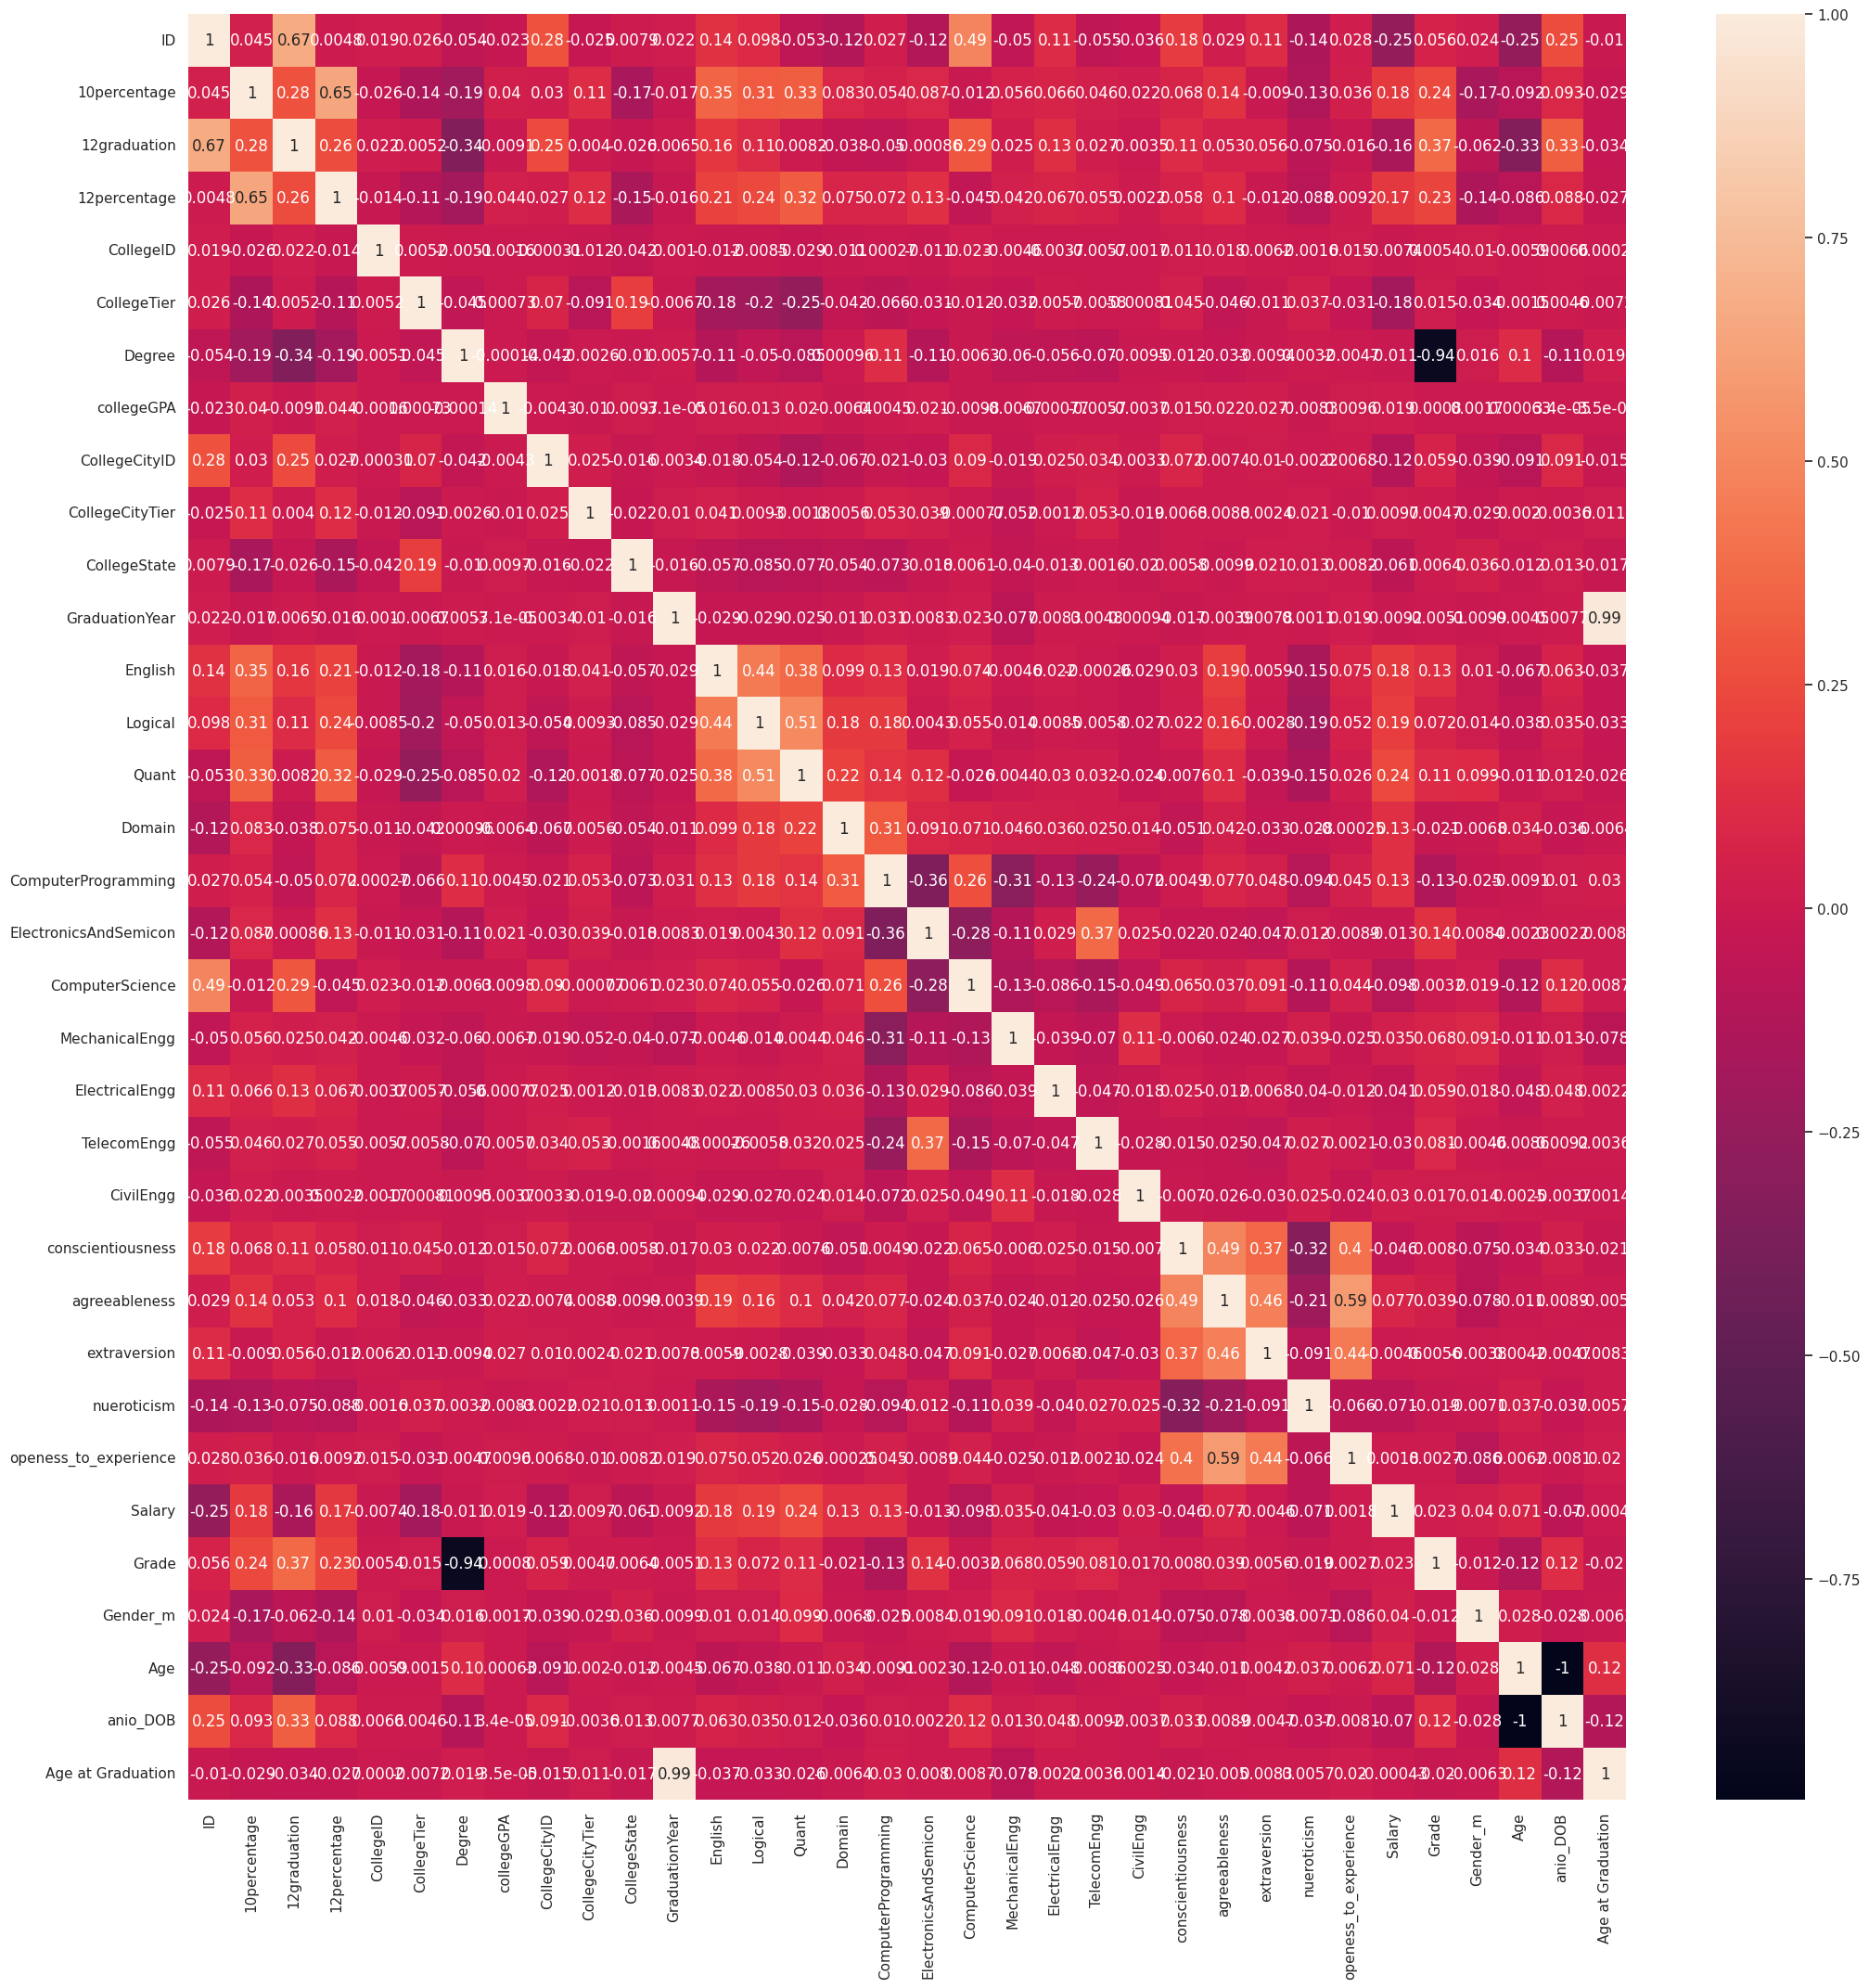

In [ ]:
#Matriz de correlación
corr = data_cleaned.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot = True)

In [ ]:
corr_matrix = data_cleaned.corr()

print(corr_matrix)

                             ID  10percentage  12graduation  12percentage  \
ID                     1.000000      0.045308      0.668960      0.004761   
10percentage           0.045308      1.000000      0.275492      0.646797   
12graduation           0.668960      0.275492      1.000000      0.255130   
12percentage           0.004761      0.646797      0.255130      1.000000   
CollegeID              0.018763     -0.026061      0.021693     -0.014212   
CollegeTier            0.026362     -0.141196      0.005233     -0.111395   
Degree                -0.054092     -0.194778     -0.339322     -0.188026   
collegeGPA            -0.022579      0.040272     -0.009078      0.044174   
CollegeCityID          0.276710      0.029808      0.248151      0.026558   
CollegeCityTier       -0.025360      0.111409      0.004004      0.117334   
CollegeState           0.007884     -0.166981     -0.025603     -0.151595   
GraduationYear         0.021595     -0.017268      0.006483     -0.015877   

## Modelado

In [ ]:
# División de los datos en variables predictoras (X) y variable objetivo (y)
X = data_cleaned.drop(['ID', 'Gender_m', 'Salary'], axis=1)
y = data_cleaned['Salary']

In [ ]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100],  # Reducido para acelerar el tiempo
    'max_depth': [None, 10],  # Mantener pocos parámetros para acelerar
}

In [ ]:
# Ajuste del modelo con búsqueda en cuadrícula
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)  # Disminuir cv para acelerar
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predicciones
y_pred = grid_search.predict(X_test)

In [ ]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse, y_pred, grid_search.best_params_

(157074.06328599923,
 array([397984.38409914, 388373.21034516, 371813.90802465, 217787.64411975,
        429703.30312229, 258396.64605774, 188631.84733765, 297931.90939458,
        364211.49209725, 294186.8099191 , 250403.67770507, 192265.59336744,
        228879.05273524, 277757.48231559, 225082.35564008, 168822.21553437,
        292096.9854411 , 268510.9412188 , 373902.43033553, 292150.75094414,
        302284.14193161, 353899.83464326, 338543.64379616, 330659.08424853,
        224121.49927769, 299785.39039736, 284162.47620017, 246518.39794129,
        436432.6318144 , 432269.28584367, 234445.96225278, 412065.00171125,
        368040.69294551, 187487.94030587, 317250.08453298, 376040.90978747,
        212032.70831475, 376804.68384606, 326586.50892948, 269615.44020461,
        235207.62591936, 459597.23526806, 279623.21687895, 433441.09351423,
        370974.42728554, 367635.5953649 , 312518.82396178, 351493.0149041 ,
        149654.78131178, 264970.6117225 , 188080.60584679, 265132.1

El resultado de la predicción de salarios usando el modelo de Random Forest es:
* **Error Cuadrático Medio (RMSE)**: 162421
* **Predicciones**: una lista de salarios predichos para el conjunto de prueba.
El modelo predijo una amplia variedad de salarios, con algunos valores en rangos altos (por ejemplo, 530,600) y otros más bajos.

## Calcular Correlaciones

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data_cleaned.corr()

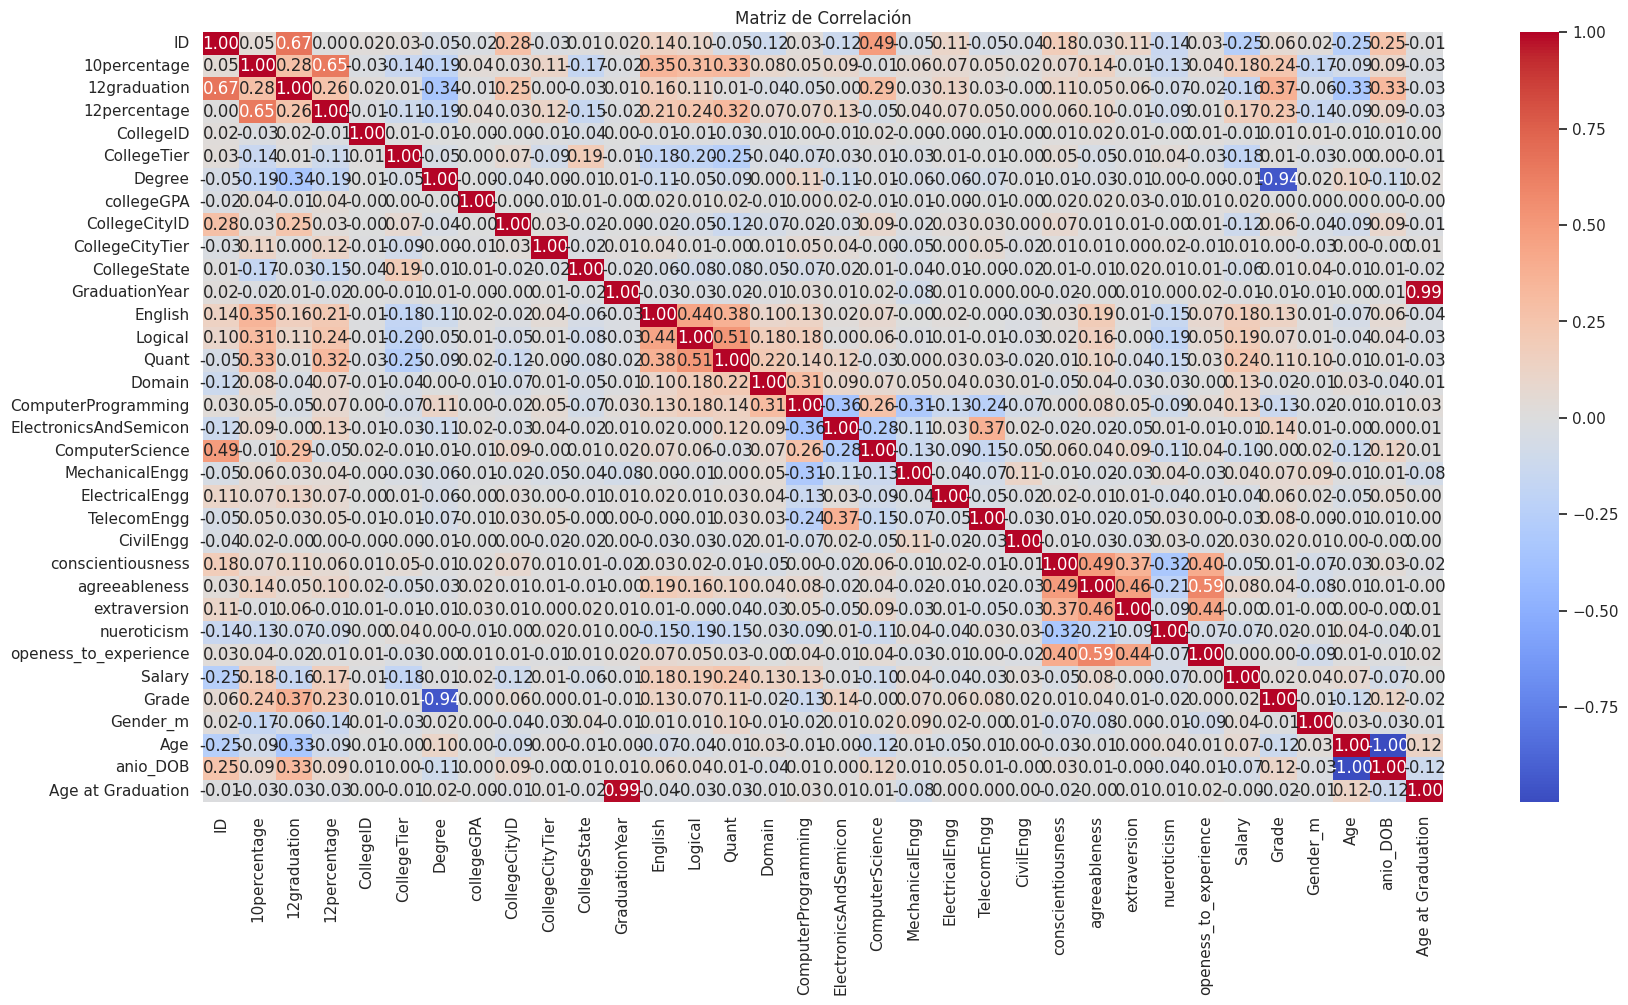

In [ ]:
# Visualizar la matriz de correlación
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Crear un dataframe de pares de variables correlacionadas
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

In [ ]:
# Filtrar para obtener solo las correlaciones por encima de un umbral
threshold = 0.5
high_correlation = correlation_pairs[(correlation_pairs['Correlation'] > threshold) &
                                           (correlation_pairs['Variable 1'] != correlation_pairs['Variable 2'])]

In [ ]:
# Ordenar la magnitud de la correlación
high_correlation = high_correlation.sort_values(by='Correlation', ascending=False)

In [ ]:
# Mostrar los resultados más correlacionados
print(high_correlation)

                 Variable 1             Variable 2  Correlation
407          GraduationYear      Age at Graduation     0.992179
1133      Age at Graduation         GraduationYear     0.992179
2                        ID           12graduation     0.668960
68             12graduation                     ID     0.668960
37             10percentage           12percentage     0.646797
103            12percentage           10percentage     0.646797
843           agreeableness  openess_to_experience     0.587246
942   openess_to_experience          agreeableness     0.587246
456                 Logical                  Quant     0.511536
489                   Quant                Logical     0.511536


In [ ]:
# Crear un DataFrame con las correlaciones sin los duplicados (triángulo inferior)
corr_pairs = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Convertir la matriz en una serie, eliminando los valores NaN
sorted_corr_pairs = corr_pairs.stack().sort_values(ascending=False)
# Seleccionar las 10 correlaciones más altas
top_10_corr = sorted_corr_pairs.head(10)
# Mostrar las 10 correlaciones más altas
print(top_10_corr)

Age                anio_DOB                 0.996665
GraduationYear     Age at Graduation        0.992179
Degree             Grade                    0.944608
ID                 12graduation             0.668960
10percentage       12percentage             0.646797
agreeableness      openess_to_experience    0.587246
Logical            Quant                    0.511536
conscientiousness  agreeableness            0.489055
ID                 ComputerScience          0.486142
agreeableness      extraversion             0.462249
dtype: float64


### Análisis de las Correlaciones
1. 12graduation y Age (0.867821): La correlación positiva indica que a medida que el valor en la columna Age aumenta, también tiende a aumentar el valor en 12graduation. Sin embargo, dado que ID es probablemente un indicador único, este resultado puede no ser significativo en términos de análisis predictivo.
2. 10percentage y 12percentage (0.6452): Una correlación alta, lo que sugiere que a medida que los porcentajes de uno aumentan, también lo hacen los del otro. Podría ser útil investigar por qué estas dos variables están tan estrechamente relacionadas.
3. agreeableness y openess_to_experience (0.5915): Una correlación positiva significativa, indicando que las personas que puntúan alto en agrreableness tienden a puntuar alto también en openess_to_experience. Esto podría tener implicaciones en perfiles de personalidad.
4. Logical y Quant (0.5131): La correlación entre habilidades lógicas y cuantitativas sugiere que aquellos que son fuertes en una de estas áreas tienden a ser fuertes en la otra. Esto puede ser relevante para determinar qué habilidades son importantes para ciertas ocupaciones.

In [ ]:
# Obtener las correlaciones con la variable objetivo 'Salary'
salary_correlation = corr['Salary'].sort_values(ascending=False)
print(salary_correlation)

Salary                   1.000000
Quant                    0.238765
Logical                  0.194170
10percentage             0.180685
English                  0.179923
12percentage             0.173104
ComputerProgramming      0.134038
Domain                   0.133003
agreeableness            0.077418
Age                      0.070538
Gender_m                 0.039974
MechanicalEngg           0.035278
CivilEngg                0.030285
Grade                    0.022541
collegeGPA               0.019109
CollegeCityTier          0.009659
openess_to_experience    0.001751
Age at Graduation       -0.000426
extraversion            -0.004634
CollegeID               -0.007408
GraduationYear          -0.009247
Degree                  -0.011069
ElectronicsAndSemicon   -0.013144
TelecomEngg             -0.030316
ElectricalEngg          -0.041138
conscientiousness       -0.045913
CollegeState            -0.061033
anio_DOB                -0.070158
nueroticism             -0.070957
ComputerScienc

OBSERVACIONES:

-REVISAR LA SIGNIFICANCIA

-VISUALIZACIÓN

-MODELO PREDICTIVO

-ANÁLISIS DE VARIABLES CATEGÓRICAS

-INVESTIGACIÓN ADICIONAL

-ELIMINAR VARIABLES IRRELEVANTES

# **LIMPIEZA FASE 2 (GRUPO 2)**

* conservar 10 percentage y 12 percentage (promedio)
* conservar collageGPA(note promedio de toda la carrera)
* Promedio AMCAT (ACLARAR QUE NO SE ASIGNA PESO DENTRO DE CADA VARIABLE AMCAT)

* Degree (los 4)
* Grade (de grado o maestria)
* College ID
* College Tier
* Edad al recibirse
* Graduation Year
* GENERO
* /-/-/-/-/-/-/-/-/-/-/
* Salary (objetivo)

In [ ]:
data_grupo2 = data_cleaned
data_grupo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2978 non-null   float64
 1   10percentage           2978 non-null   float64
 2   12graduation           2978 non-null   float64
 3   12percentage           2978 non-null   float64
 4   CollegeID              2978 non-null   float64
 5   CollegeTier            2978 non-null   float64
 6   Degree                 2978 non-null   int64  
 7   collegeGPA             2978 non-null   float64
 8   CollegeCityID          2978 non-null   float64
 9   CollegeCityTier        2978 non-null   float64
 10  CollegeState           2978 non-null   int64  
 11  GraduationYear         2978 non-null   float64
 12  English                2978 non-null   int64  
 13  Logical                2978 non-null   int64  
 14  Quant                  2978 non-null   int64  
 15  Domain   

In [ ]:
data_grupo2['10and12percentage'] = (data_grupo2['10percentage'] + data_grupo2['12percentage']) / 2
data_grupo2.drop(columns=['ID','12graduation','CollegeCityID','CollegeCityTier','CollegeState','Age','anio_DOB'], inplace=True)

In [ ]:
data_grupo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   10percentage           2978 non-null   float64
 1   12percentage           2978 non-null   float64
 2   CollegeID              2978 non-null   float64
 3   CollegeTier            2978 non-null   float64
 4   Degree                 2978 non-null   int64  
 5   collegeGPA             2978 non-null   float64
 6   GraduationYear         2978 non-null   float64
 7   English                2978 non-null   int64  
 8   Logical                2978 non-null   int64  
 9   Quant                  2978 non-null   int64  
 10  Domain                 2978 non-null   float64
 11  ComputerProgramming    2978 non-null   float64
 12  ElectronicsAndSemicon  2978 non-null   float64
 13  ComputerScience        2978 non-null   float64
 14  MechanicalEngg         2978 non-null   float64
 15  Electrica

VAMOS A TOMAR COMO QUE TODAS LAS NOTAS RELACIONADAS CON AMCAT TIENEN EL MISMO PESO, Y HAREMOS UN PROMEDIO DE LAS MISMAS.

In [ ]:
columns_to_average = [
    'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
    'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
    'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
    'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'
]

# Función para calcular el promedio por fila, excluyendo los valores -1
def calculate_row_average(row):
    valid_values = row[columns_to_average][row[columns_to_average] != -1]  # Excluye los valores -1
    return valid_values.mean()  # Calcula el promedio de los valores válidos

# Crear la nueva columna 'PromAMCAT' calculando el promedio por fila
data_grupo2['PromAMCAT'] = data_grupo2.apply(calculate_row_average, axis=1)

# Mostrar el DataFrame con la nueva columna 'PromAMCAT'
print(data_grupo2[['PromAMCAT']])

       PromAMCAT
0     270.780798
1     145.300171
2     193.379688
3     258.682671
4     174.721089
...          ...
2993  183.057335
2994  163.983785
2995  173.028646
2996  216.220712
2997  157.548050

[2978 rows x 1 columns]


VAMOS A SEPARAR EN 2 DF
* 1 PARA PROMEDIOS
* 1 PARA INDIVIDUALES

In [ ]:
columns_para_descarte = [
    'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
    'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
    'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
    'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '10percentage', '12percentage'
]

In [ ]:
g2_solo_promedios = data_grupo2.drop(columns=columns_para_descarte)
g2_solo_individuales = data_grupo2.drop(columns=['10and12percentage', 'PromAMCAT'])

In [ ]:
g2_solo_promedios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CollegeID          2978 non-null   float64
 1   CollegeTier        2978 non-null   float64
 2   Degree             2978 non-null   int64  
 3   collegeGPA         2978 non-null   float64
 4   GraduationYear     2978 non-null   float64
 5   Salary             2978 non-null   int64  
 6   Grade              2978 non-null   int64  
 7   Gender_m           2978 non-null   bool   
 8   Age at Graduation  2978 non-null   float64
 9   10and12percentage  2978 non-null   float64
 10  PromAMCAT          2978 non-null   float64
dtypes: bool(1), float64(7), int64(3)
memory usage: 258.8 KB


In [ ]:
g2_solo_individuales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 0 to 2997
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   10percentage           2978 non-null   float64
 1   12percentage           2978 non-null   float64
 2   CollegeID              2978 non-null   float64
 3   CollegeTier            2978 non-null   float64
 4   Degree                 2978 non-null   int64  
 5   collegeGPA             2978 non-null   float64
 6   GraduationYear         2978 non-null   float64
 7   English                2978 non-null   int64  
 8   Logical                2978 non-null   int64  
 9   Quant                  2978 non-null   int64  
 10  Domain                 2978 non-null   float64
 11  ComputerProgramming    2978 non-null   float64
 12  ElectronicsAndSemicon  2978 non-null   float64
 13  ComputerScience        2978 non-null   float64
 14  MechanicalEngg         2978 non-null   float64
 15  Electrica

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = g2_solo_promedios.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                   CollegeID  CollegeTier    Degree  collegeGPA  \
CollegeID           1.000000     0.005238 -0.005067   -0.001647   
CollegeTier         0.005238     1.000000 -0.045456    0.000725   
Degree             -0.005067    -0.045456  1.000000   -0.000142   
collegeGPA         -0.001647     0.000725 -0.000142    1.000000   
GraduationYear      0.001027    -0.006707  0.005654   -0.000031   
Salary             -0.007408    -0.177794 -0.011069    0.019109   
Grade               0.005359     0.014952 -0.944608    0.000798   
Gender_m            0.010283    -0.034057  0.016399    0.001659   
Age at Graduation   0.000202    -0.007236  0.018851   -0.000035   
10and12percentage  -0.021828    -0.138240 -0.210661    0.046634   
PromAMCAT          -0.018357    -0.265182 -0.071956    0.012619   

                   GraduationYear    Salary     Grade  Gender_m  \
CollegeID                0.001027 -0.007408  0.005359  0.010283   
CollegeTier             -0.006707 -0.177794  0.014952 -0.0340

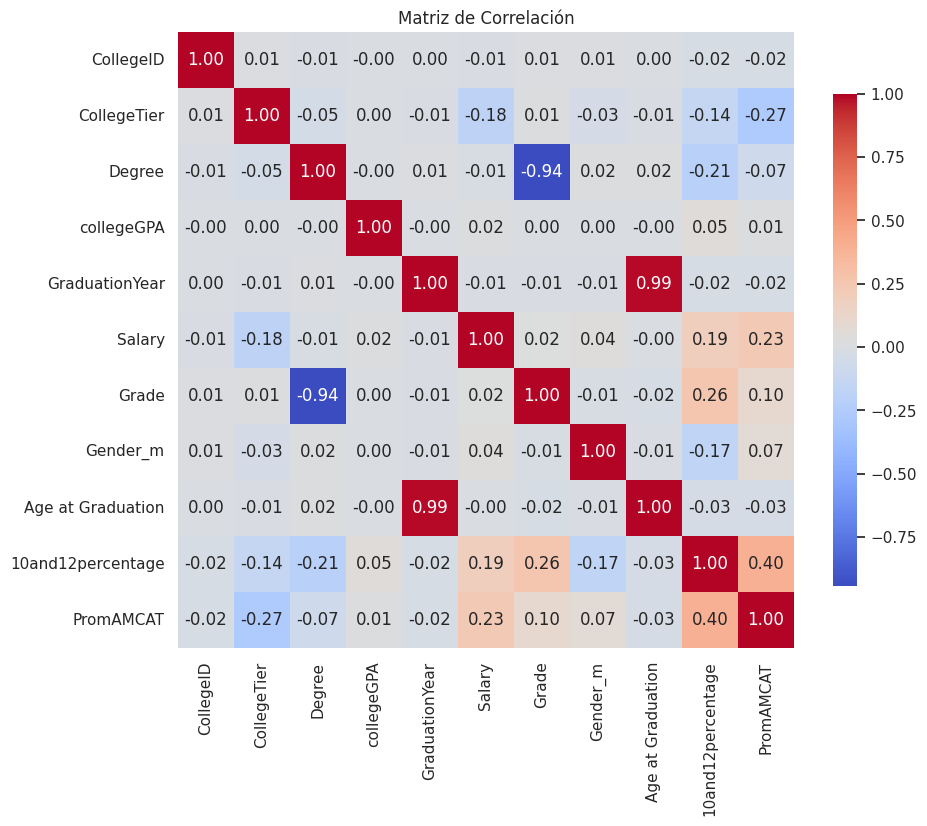

In [ ]:
# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

DE ESTE ESTUDIO SACAMOS QUE HAY RELACIONES ENTRE LOS PROMEDIOS DE LAS NOTAS DE AMCAT Y DE LA SECUNDARIA CON RELACION AL SUELDO.
* EN OTRA INSTANCIA, NOTAMOS UNA RELACION DE NOTAS DE SECUNDARIA Y COMO EL ALUMNO TERMINA ESTUDIANDO UNA CARRERA DE GRADO.

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = g2_solo_individuales.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                       10percentage  12percentage  CollegeID  CollegeTier  \
10percentage               1.000000      0.646797  -0.026061    -0.141196   
12percentage               0.646797      1.000000  -0.014212    -0.111395   
CollegeID                 -0.026061     -0.014212   1.000000     0.005238   
CollegeTier               -0.141196     -0.111395   0.005238     1.000000   
Degree                    -0.194778     -0.188026  -0.005067    -0.045456   
collegeGPA                 0.040272      0.044174  -0.001647     0.000725   
GraduationYear            -0.017268     -0.015877   0.001027    -0.006707   
English                    0.347597      0.213943  -0.012377    -0.184936   
Logical                    0.310539      0.238759  -0.008506    -0.196176   
Quant                      0.328111      0.317613  -0.029103    -0.251103   
Domain                     0.082626      0.074658  -0.010685    -0.041649   
ComputerProgramming        0.054230      0.072362   0.000269    -0.066264   

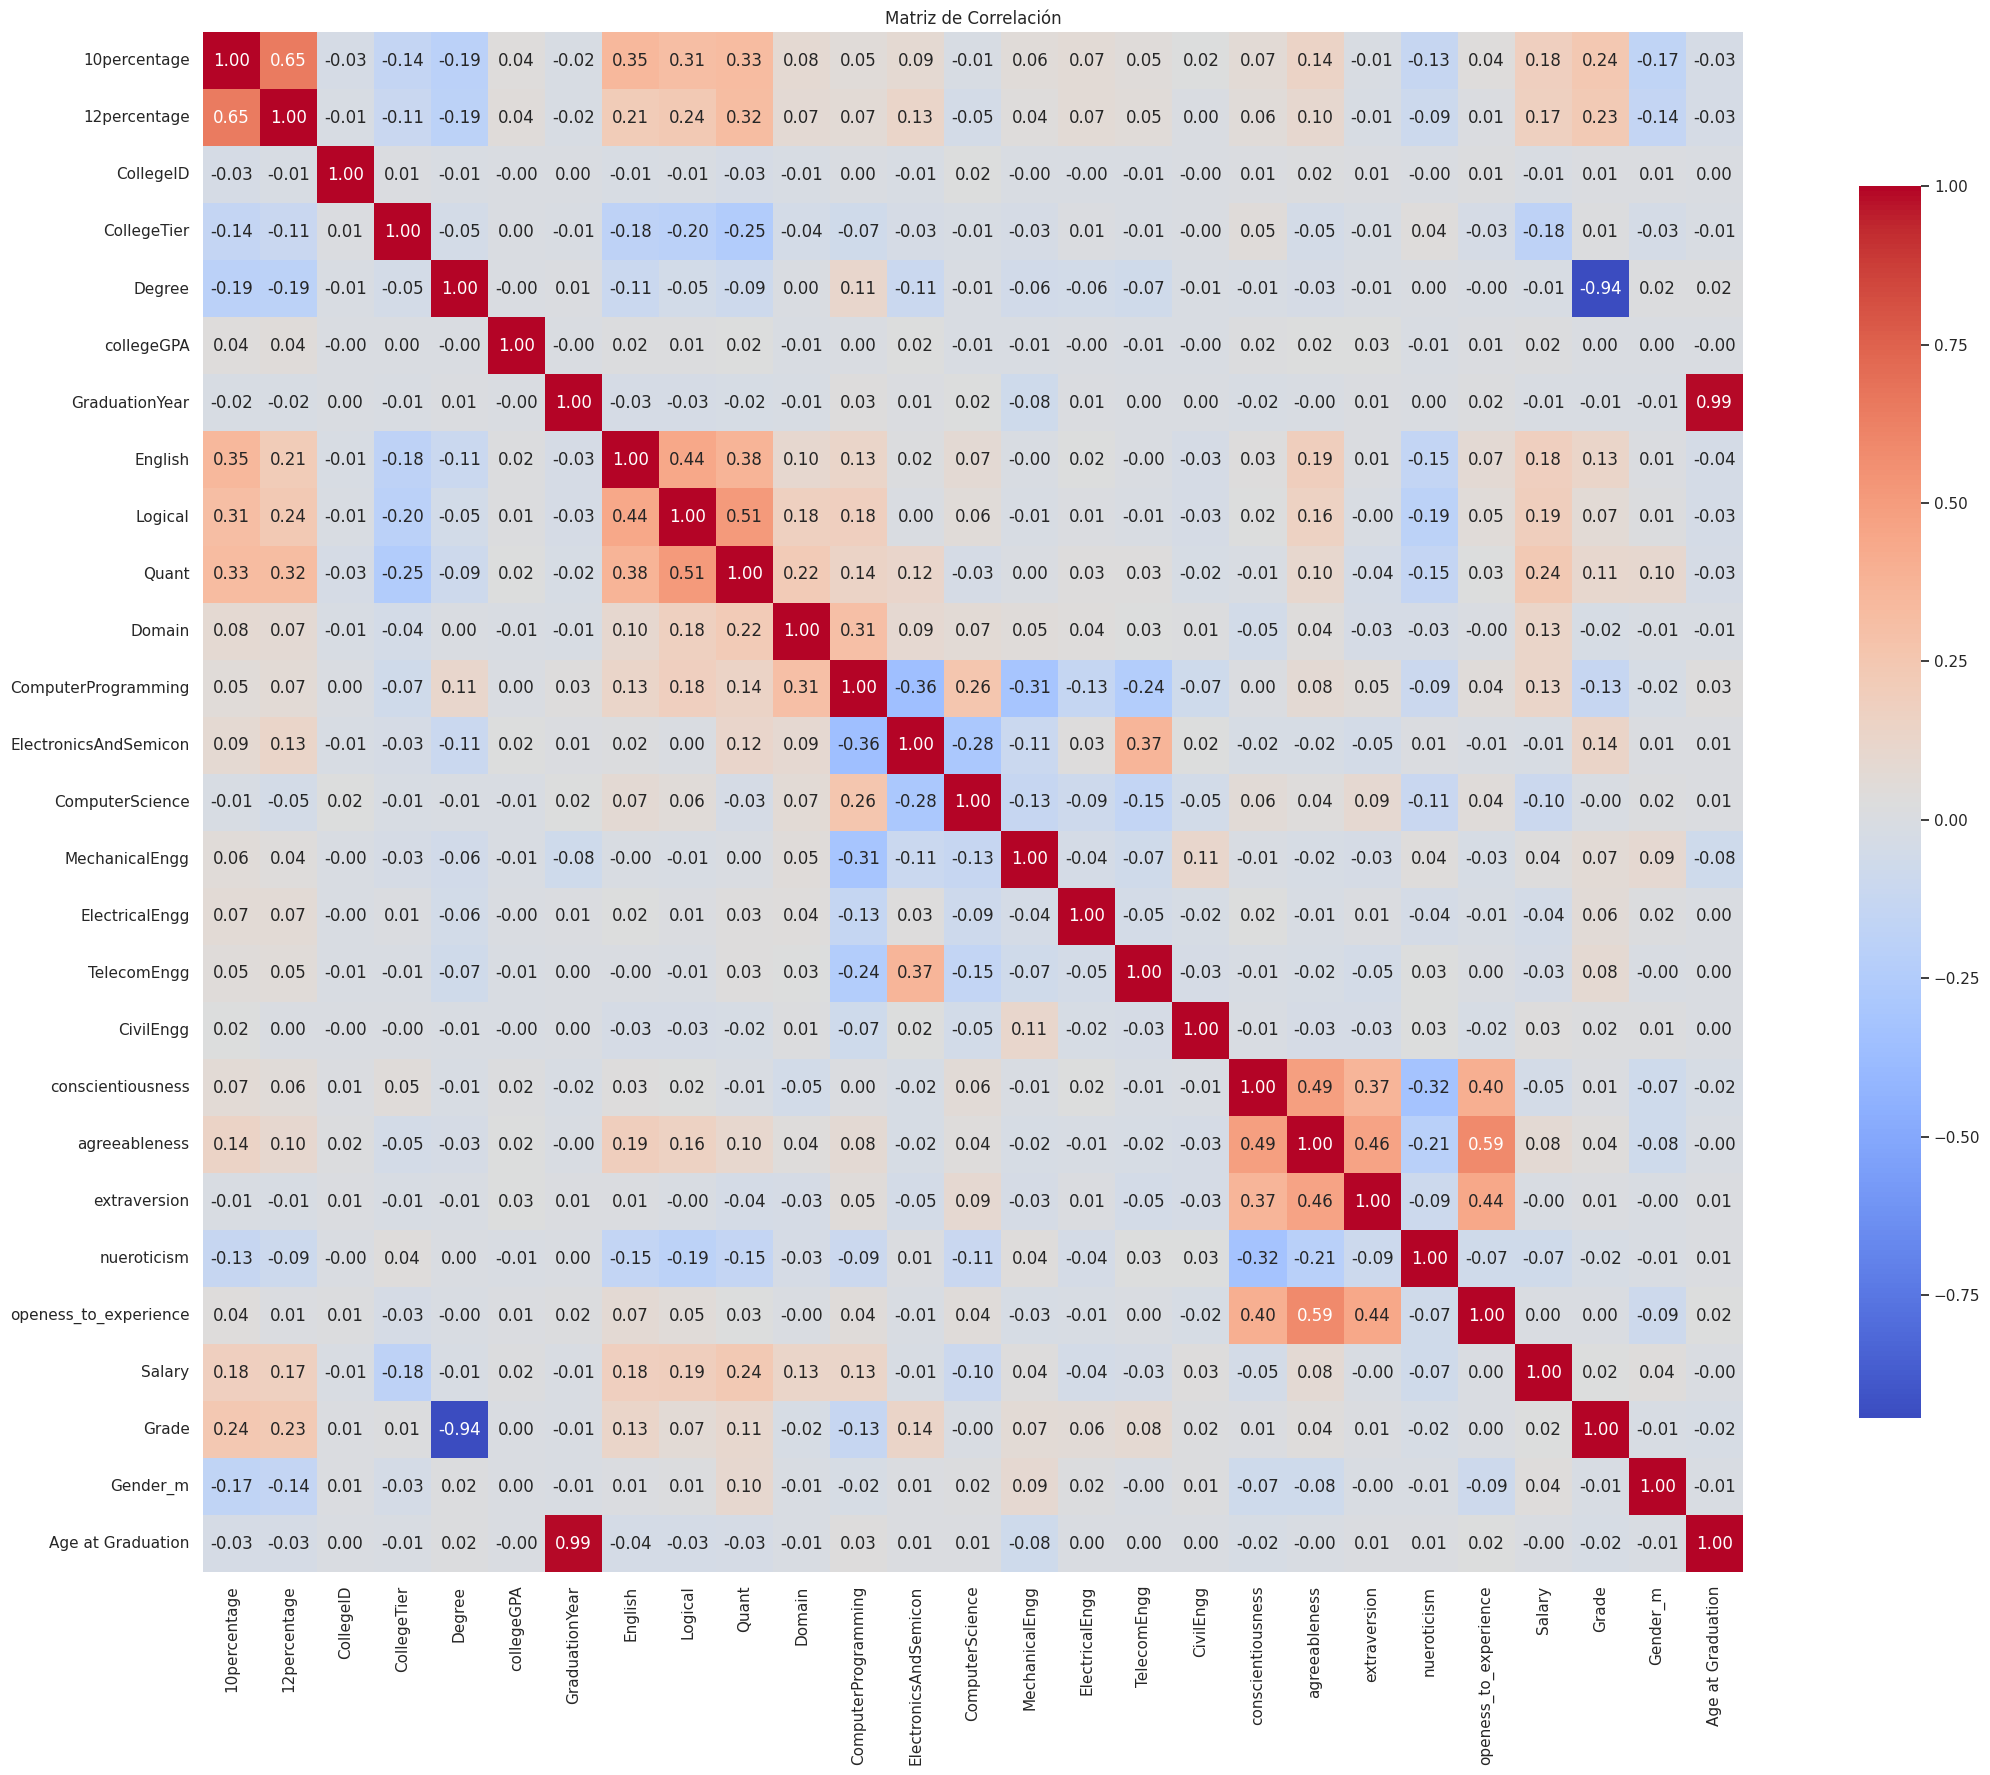

In [ ]:
# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

CON ESTA MATRIZ NOS DAMOS CUENTA QUE LOS ITEMS RELEVANTES PARA UN BUEN SALARIO SEGUN ESTE ESTUDIO SON:
* BUENA NOTA EN LOS EXAMENES DE SECUNDARIA
* TENER INGLES
* TENER LOGICA
* TENES QUANT
* TENER DOMINIO
* TENER PROGRAMACION

NOTA PARA EL LUNES 14

POR HACER (EN AMBAS PLANILLAS):

* MODELO DE RANDOM FORREST (FEATURE IMPORTANCE)
* PREDECIR (CON AMBAS PLANILLAS)

Planillas:
  * g2_solo_individuales
  * g2_solo_promedios


# **ESTUDIO DE FEATURES PARA PROMEDIO**

Feature Importances:
             Feature  Importance
9          PromAMCAT    0.203682
8  10and12percentage    0.198489
0          CollegeID    0.193415
3         collegeGPA    0.190243
7  Age at Graduation    0.084408
4     GraduationYear    0.066652
6           Gender_m    0.030034
1        CollegeTier    0.013244
2             Degree    0.011020
5              Grade    0.008812


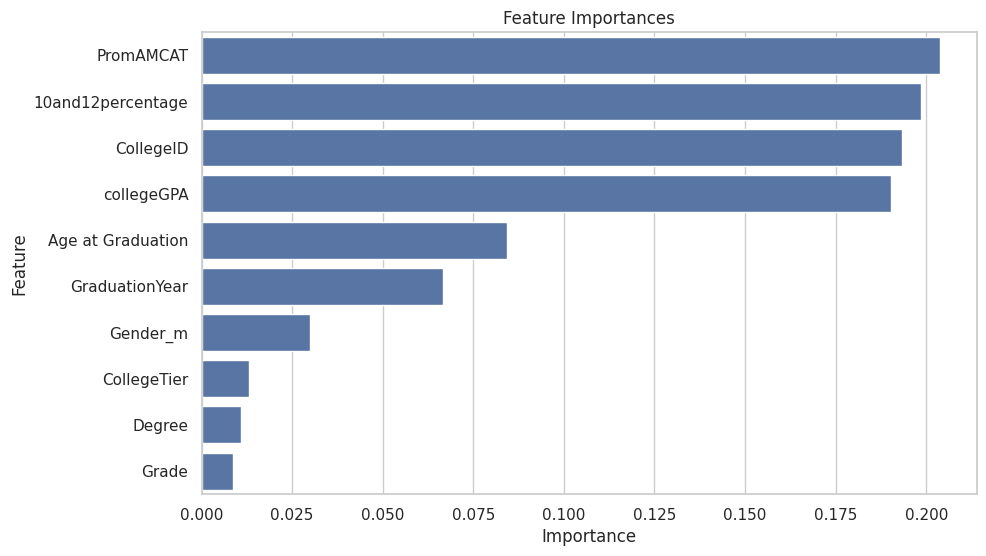

In [ ]:
# Define the features and target variable
features = [
    'CollegeID', 'CollegeTier', 'Degree', 'collegeGPA', 'GraduationYear', 'Grade', 'Gender_m', 'Age at Graduation', '10and12percentage', 'PromAMCAT'
]

target_feature = 'Salary'

# Split data into training and testing sets
X = g2_solo_promedios[features]
y = g2_solo_promedios[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances

print("Feature Importances:")

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importances')

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.show()

Mean Accuracy from Cross-Validation: 0.05674750437087587
Feature Importances:
CollegeID: 0.19594671611567896
CollegeTier: 0.012853528309778045
Degree: 0.010720010265980537
collegeGPA: 0.19130558191567784
GraduationYear: 0.06723168692994773
Grade: 0.008187187124531852
Gender_m: 0.026913740556045333
Age at Graduation: 0.08584870733208382
10and12percentage: 0.19681170524233435
PromAMCAT: 0.20418113620794143


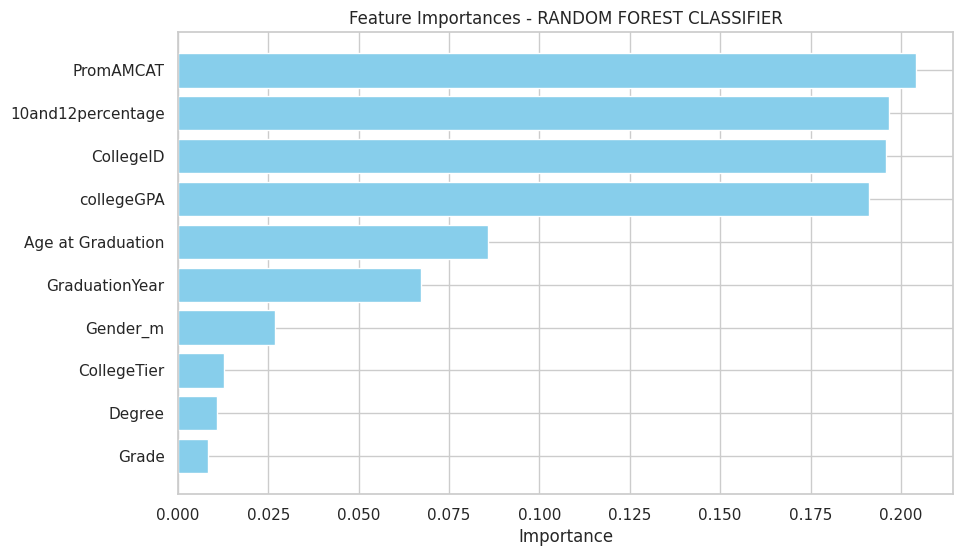

In [ ]:
# Define your features and target variable
features = [
 'CollegeID', 'CollegeTier', 'Degree', 'collegeGPA', 'GraduationYear', 'Grade', 'Gender_m', 'Age at Graduation', '10and12percentage', 'PromAMCAT'
]

target = 'Salary'

# Assuming df is your DataFrame containing the data
X = g2_solo_promedios[features]
y = g2_solo_promedios[target]

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation to assess feature importance
# Number of folds for cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf, X, y, cv=5)

# Fit the RandomForestClassifier to get feature importances
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Print mean accuracy from cross-validation
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

# Print feature importances
print("Feature Importances:")
for i, feature in enumerate(features):
    print(f"{feature}: {feature_importances[i]}")

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - RANDOM FOREST CLASSIFIER')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# **CONCLUSION: **

# Encontramos que con el modelo para encontrar las variables más importantes, coinciden dos de las variables que habíamos encontrado previamente.

# Nosotros habíamos encontrado como feature o influyente del salario la variable  PromAMCAT y 10and12percentage y con el modelo de feature importance encontramos PromAMCAT y 10and12percentage, CollegeGPA, College ID.

# Se puede observar que a travez de usar un modelo de random Forest para features , el resultado obtenido es muy parecido a lo que se encontró en la matriz de correlación previamente echa , ademas de agregar dos variables mas como colegio id y colegiogpa

# **ESTUDIO DE FEATURES PARA INDIVIDUALES**

Feature Importances:
                  Feature  Importance
0            10percentage    0.066001
5              collegeGPA    0.064930
2               CollegeID    0.064607
1            12percentage    0.064432
9                   Quant    0.061670
7                 English    0.060597
21            nueroticism    0.060364
8                 Logical    0.059558
18      conscientiousness    0.059048
20           extraversion    0.057476
19          agreeableness    0.056218
22  openess_to_experience    0.055916
10                 Domain    0.055359
11    ComputerProgramming    0.051200
6          GraduationYear    0.032074
25      Age at Graduation    0.031602
12  ElectronicsAndSemicon    0.022764
13        ComputerScience    0.019508
24               Gender_m    0.012089
16            TelecomEngg    0.010994
14         MechanicalEngg    0.008751
3             CollegeTier    0.006080
4                  Degree    0.005981
15         ElectricalEngg    0.005852
23                  Grade    

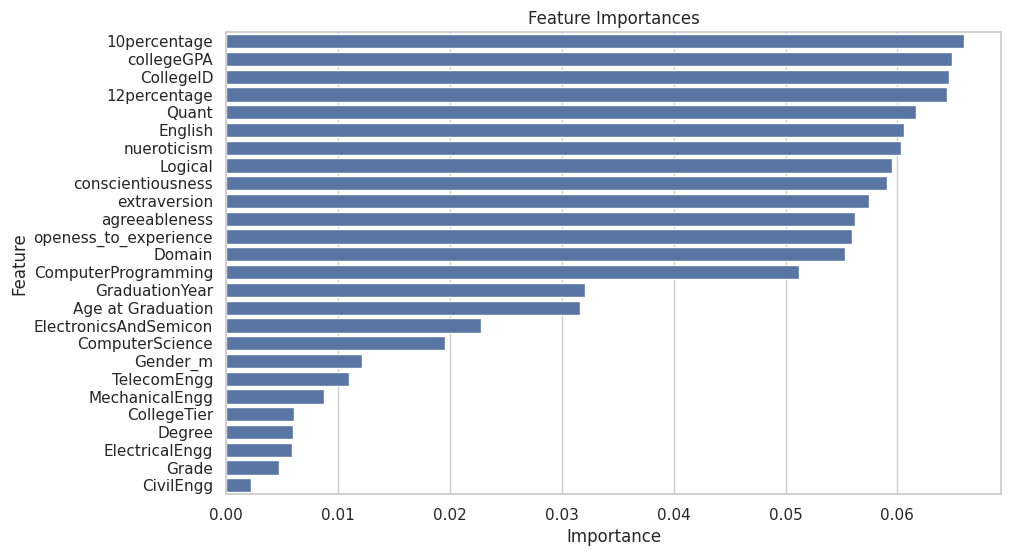

In [ ]:
# Define the features and target variable
features = [
    '10percentage','12percentage','CollegeID','CollegeTier','Degree','collegeGPA','GraduationYear',
    'English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience',
    'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion',
    'nueroticism','openess_to_experience','Grade','Gender_m','Age at Graduation'
]

target_feature = 'Salary'

# Split data into training and testing sets
X = g2_solo_individuales[features]
y = g2_solo_individuales[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances

print("Feature Importances:")

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importances')

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.show()

Mean Accuracy from Cross-Validation: 0.07286221871298855
Feature Importances:
10percentage: 0.06554180192986879
12percentage: 0.0646694179620478
CollegeID: 0.06403300532435481
CollegeTier: 0.005674514444502882
Degree: 0.005594001945251662
collegeGPA: 0.06620661373226965
GraduationYear: 0.031002936915329297
English: 0.06186592498764772
Logical: 0.059773606259181156
Quant: 0.062207656620092956
Domain: 0.05517682472943787
ComputerProgramming: 0.04979388087091444
ElectronicsAndSemicon: 0.02353769742973294
ComputerScience: 0.019485046026989878
MechanicalEngg: 0.008650071877762622
ElectricalEngg: 0.005882425891600577
TelecomEngg: 0.011021535698302921
CivilEngg: 0.0016058334245451058
conscientiousness: 0.05910012105508753
agreeableness: 0.055679520929050985
extraversion: 0.057682712245831956
nueroticism: 0.060427459198555175
openess_to_experience: 0.05619402737727979
Grade: 0.0047607398248188095
Gender_m: 0.012707041307454958
Age at Graduation: 0.031725581992087824


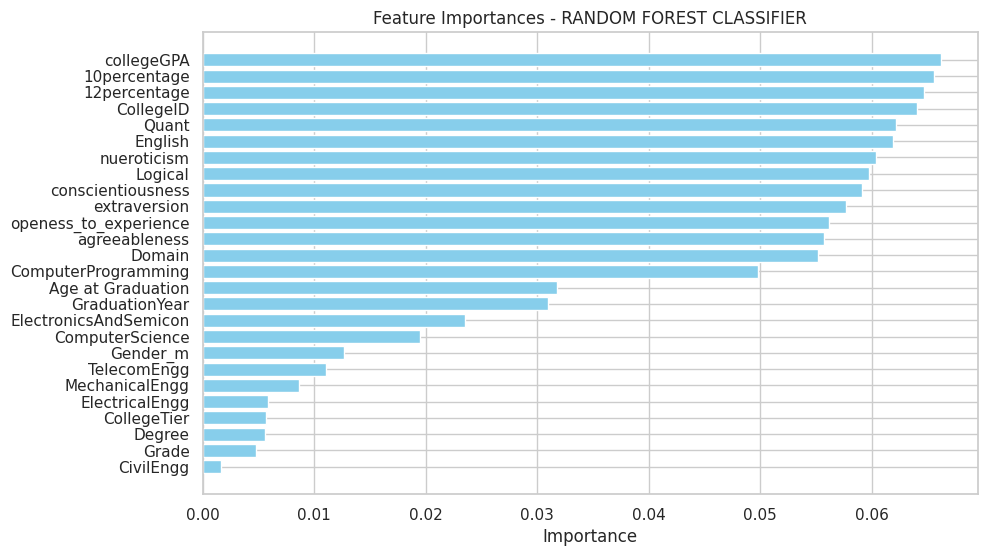

In [ ]:
# Define your features and target variable
features = [
     '10percentage','12percentage','CollegeID','CollegeTier','Degree','collegeGPA','GraduationYear',
    'English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience',
    'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion',
    'nueroticism','openess_to_experience','Grade','Gender_m','Age at Graduation'
]

target = 'Salary'

# Assuming df is your DataFrame containing the data
X = g2_solo_individuales[features]
y = g2_solo_individuales[target]

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation to assess feature importance
# Number of folds for cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf, X, y, cv=5)

# Fit the RandomForestClassifier to get feature importances
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Print mean accuracy from cross-validation
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

# Print feature importances
print("Feature Importances:")
for i, feature in enumerate(features):
    print(f"{feature}: {feature_importances[i]}")

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - RANDOM FOREST CLASSIFIER')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Las conclusiones se asemejan an las anteriores por lo que no haremos un descargo.

# ***CONCLUSION FINAL***

# Debido a que la efectividad del cross validation tiene un valor de 0.05 y 0.07 respectivamente (muy bajo).

`# Como tarea futura, sugerimos calcular los P-values de las variables más importantes para evaluar su correlación con el Target. Si la correlación es demasiado alta, se debería considerar su eliminación. De lo contrario, recomendamos aplicar la función logaritmo para normalizarlas.`

# **`Para un futuro modelo de predicción del salario de una persona, recomendamos conservar y basar el análisis en las cuatro variables más relevantes de este estudio:`**

* Porcentaje de notas de 10º y 12º grado
* GPA (promedio general)
* Universidad a la que asistió
* Notas en el examen AMCAT


